In [4]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mlrefined_libraries import convnets_library as convlib
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import multilayer_perceptron_library as network_lib
import autograd.numpy as np
import pandas as pd
import cv2
from PIL import Image
import pickle
import gzip
import time

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Edge detection via convolution

<IPython.core.display.Javascript object>


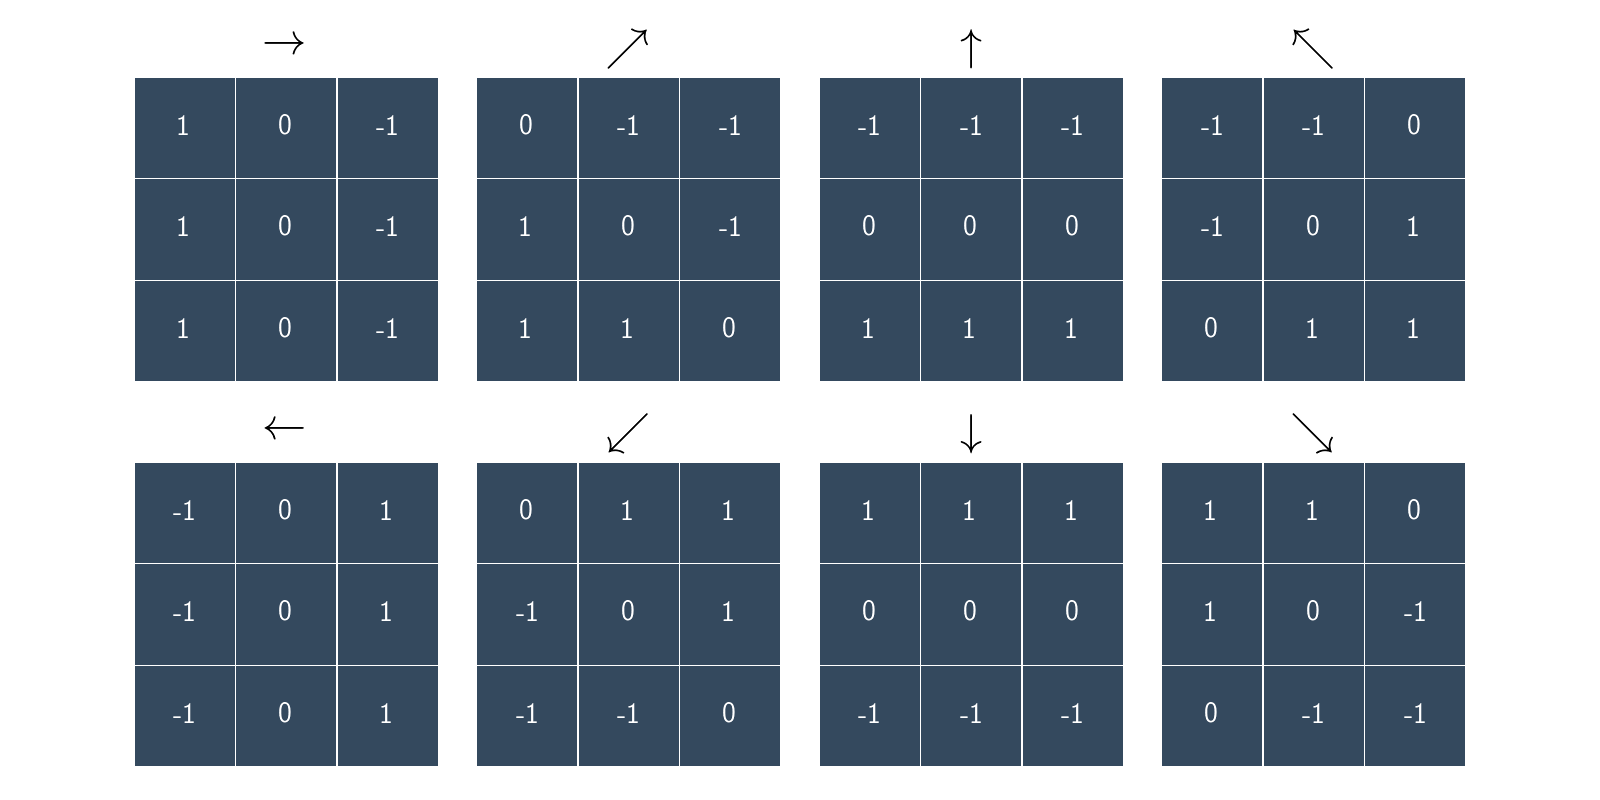

In [7]:
convlib.image_viz.show_conv_kernels()

<IPython.core.display.Javascript object>


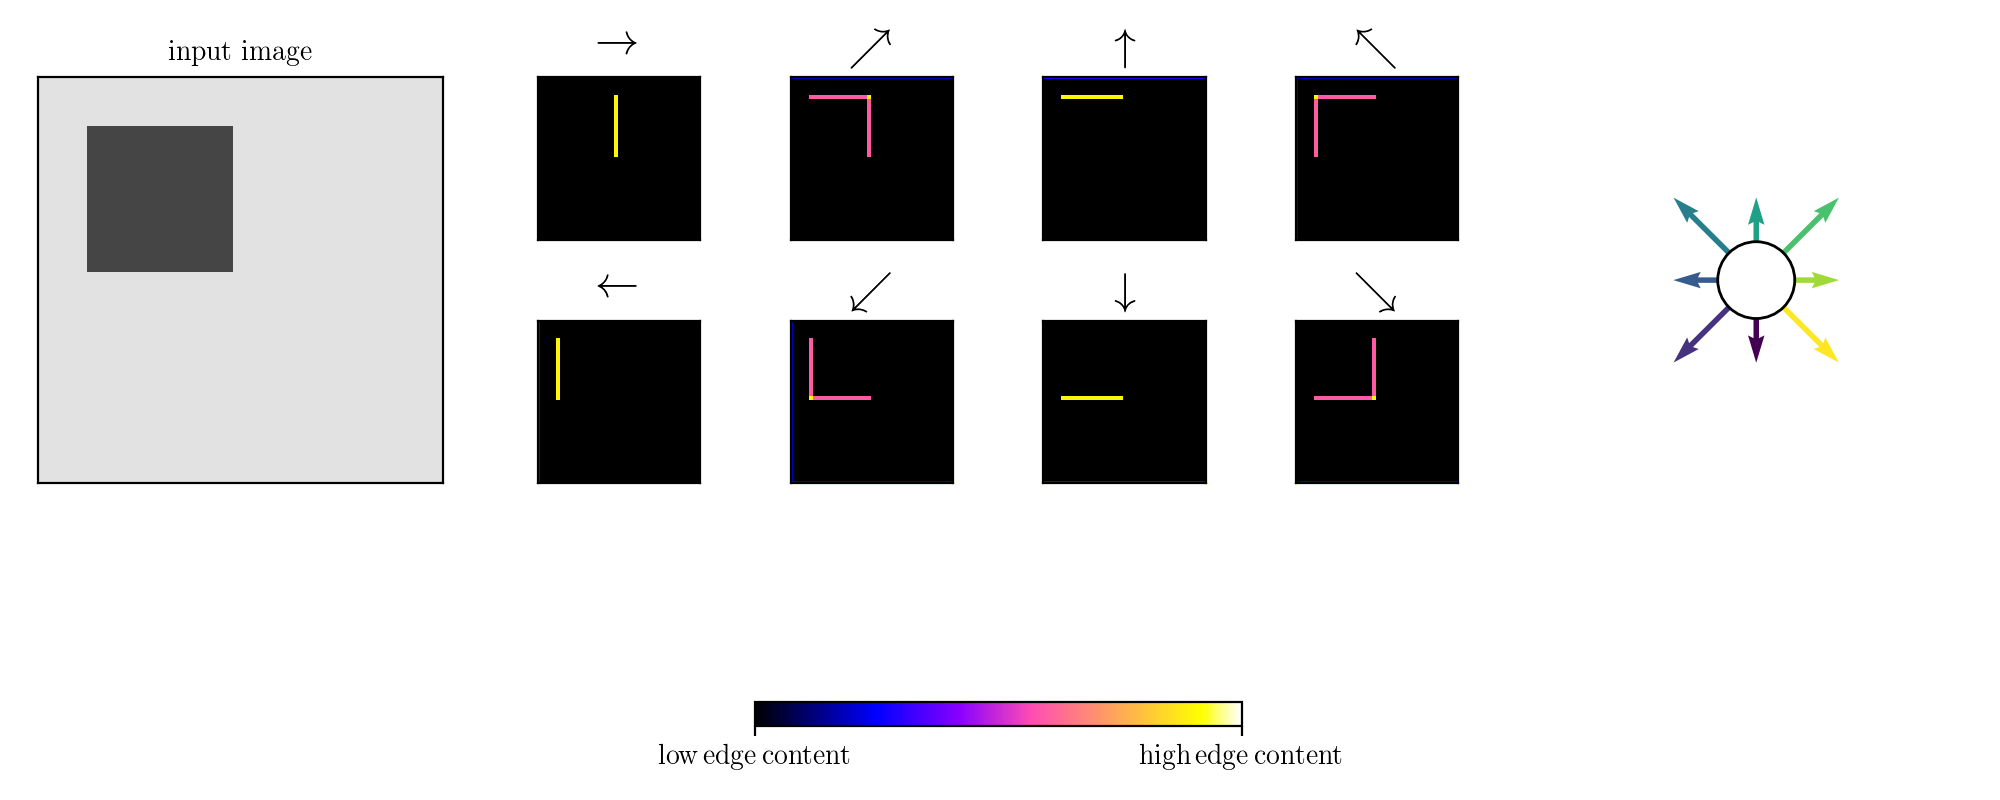

In [8]:
# load image
image = convlib.image_viz.create_image('square_top')

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


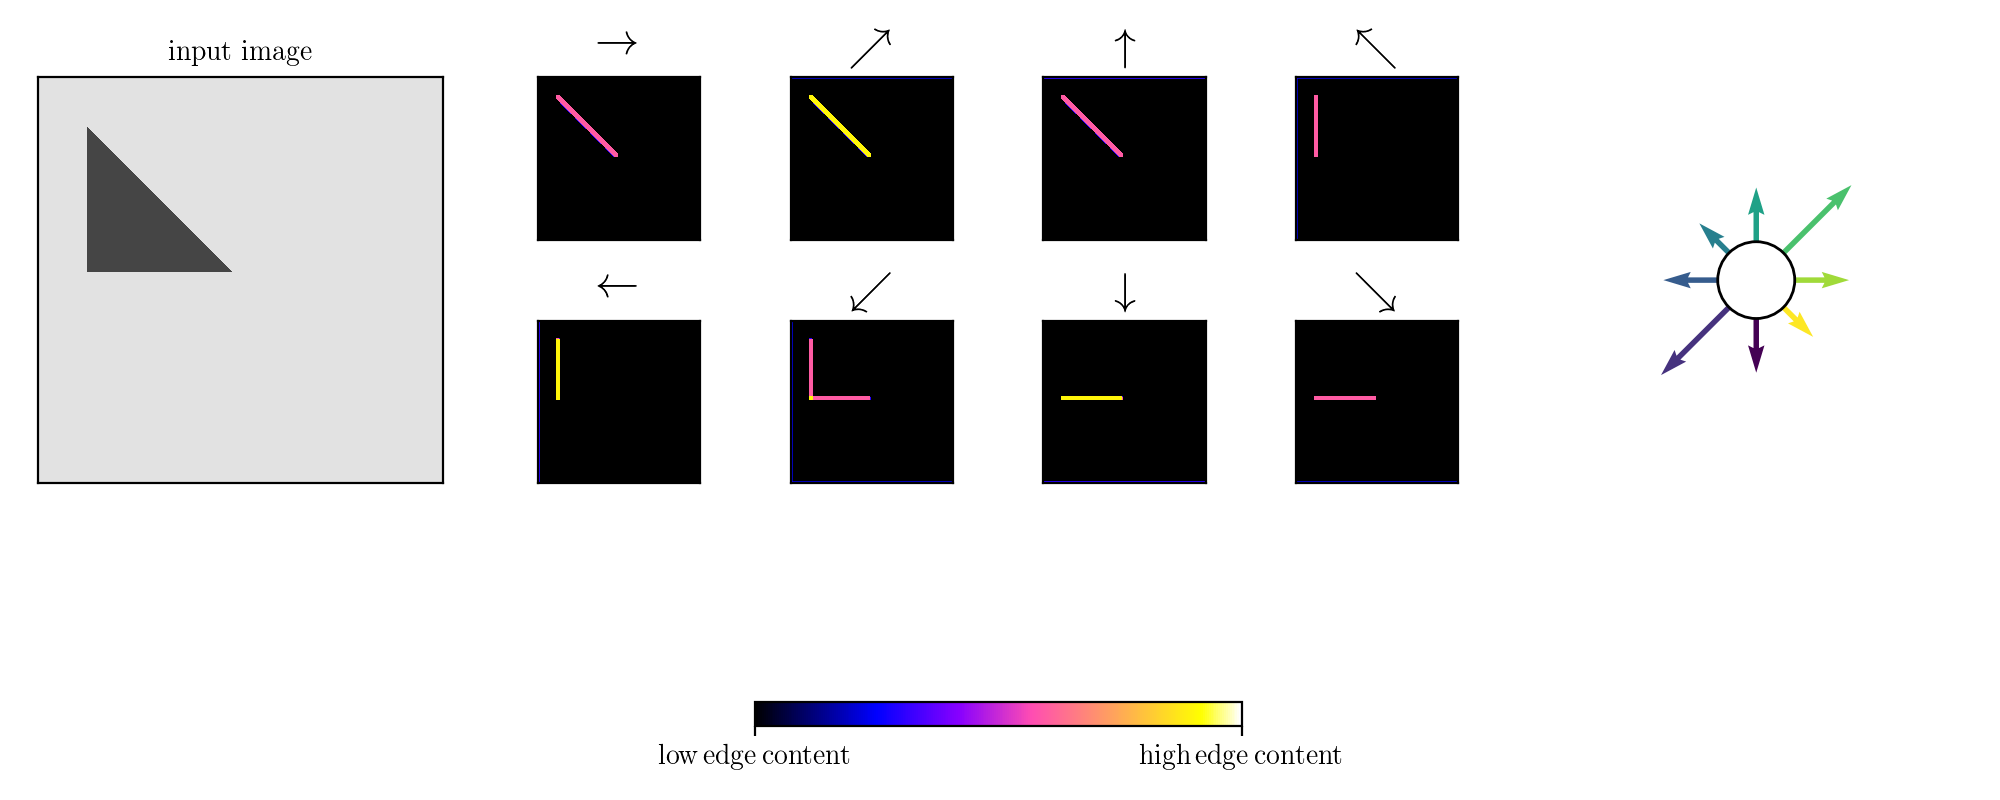

In [9]:
# load image
image = convlib.image_viz.create_image('triangle_top')

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


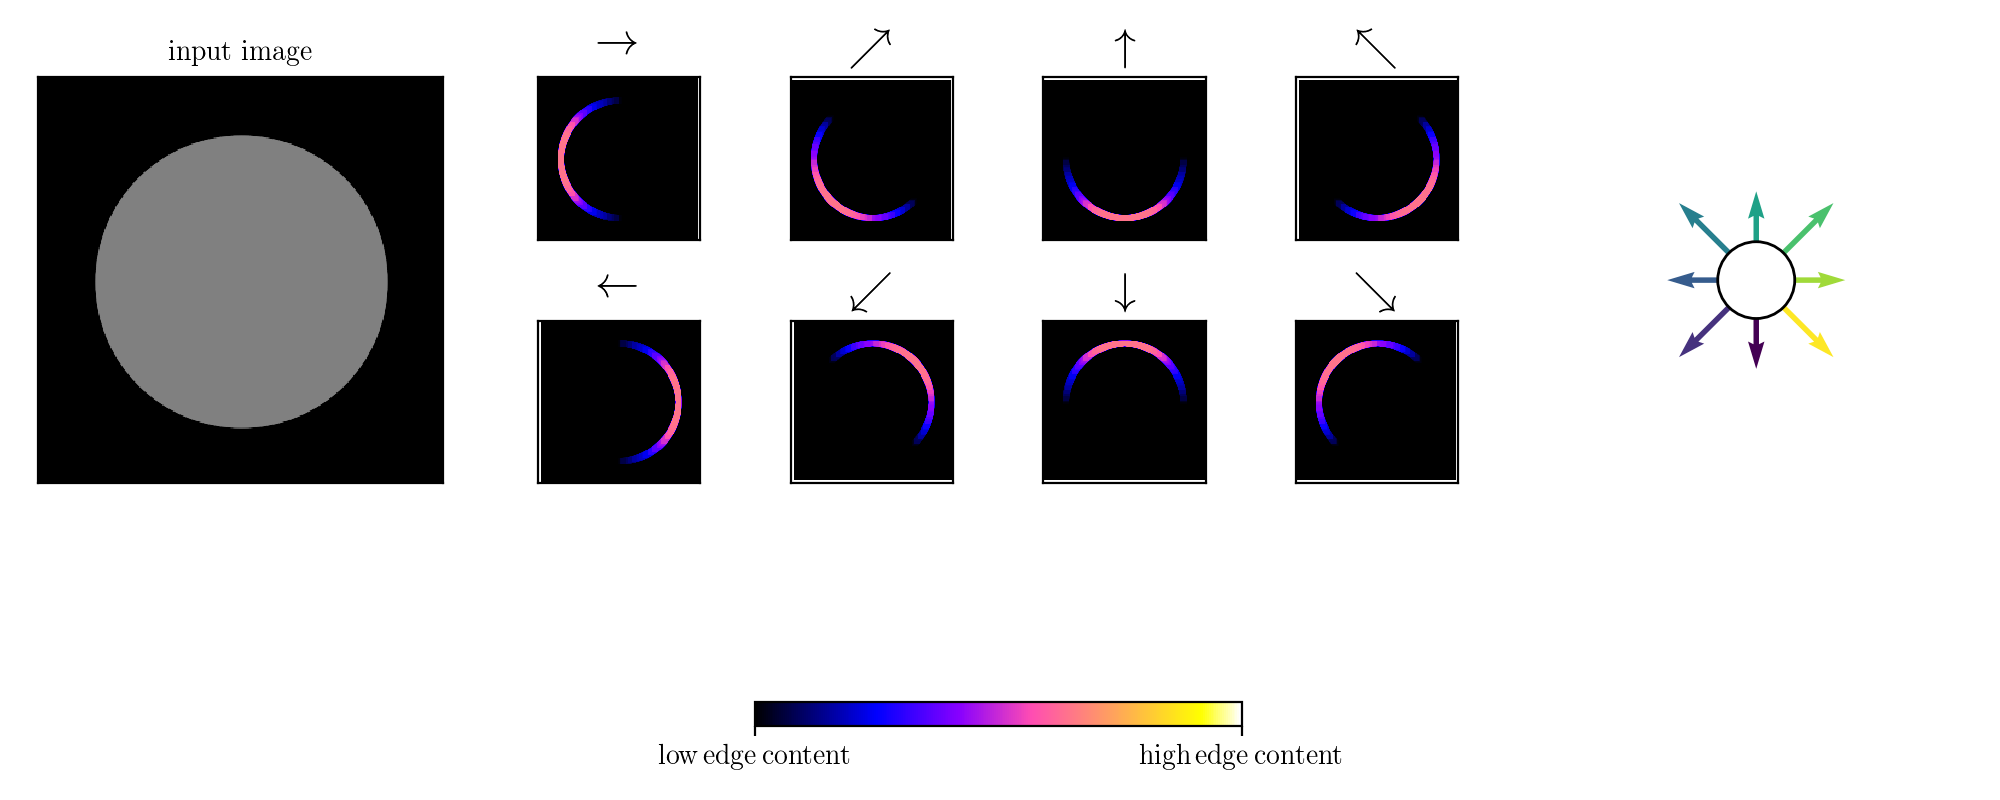

In [10]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/circle.png',0)
#image = Image.open('../../mlrefined_images/convnet_images/circle.png').convert('L')

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


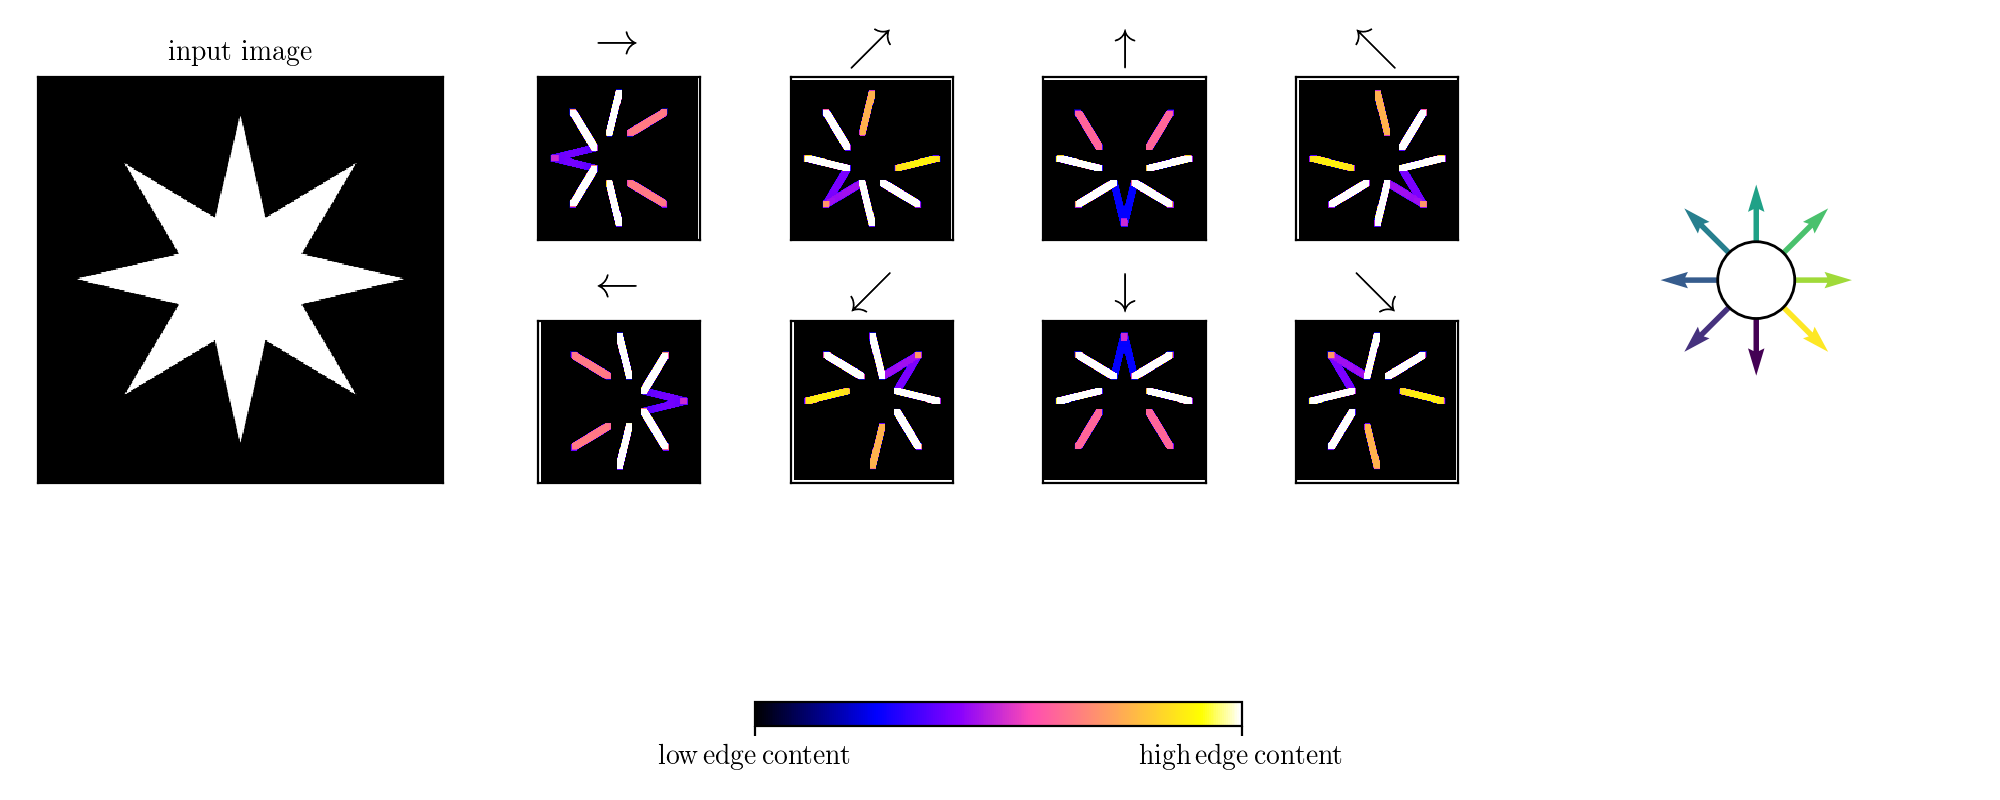

In [11]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/star.png', 0)

# downsample the image (if too large)
image = cv2.resize(image, (0,0), fx=0.25, fy=0.25)

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


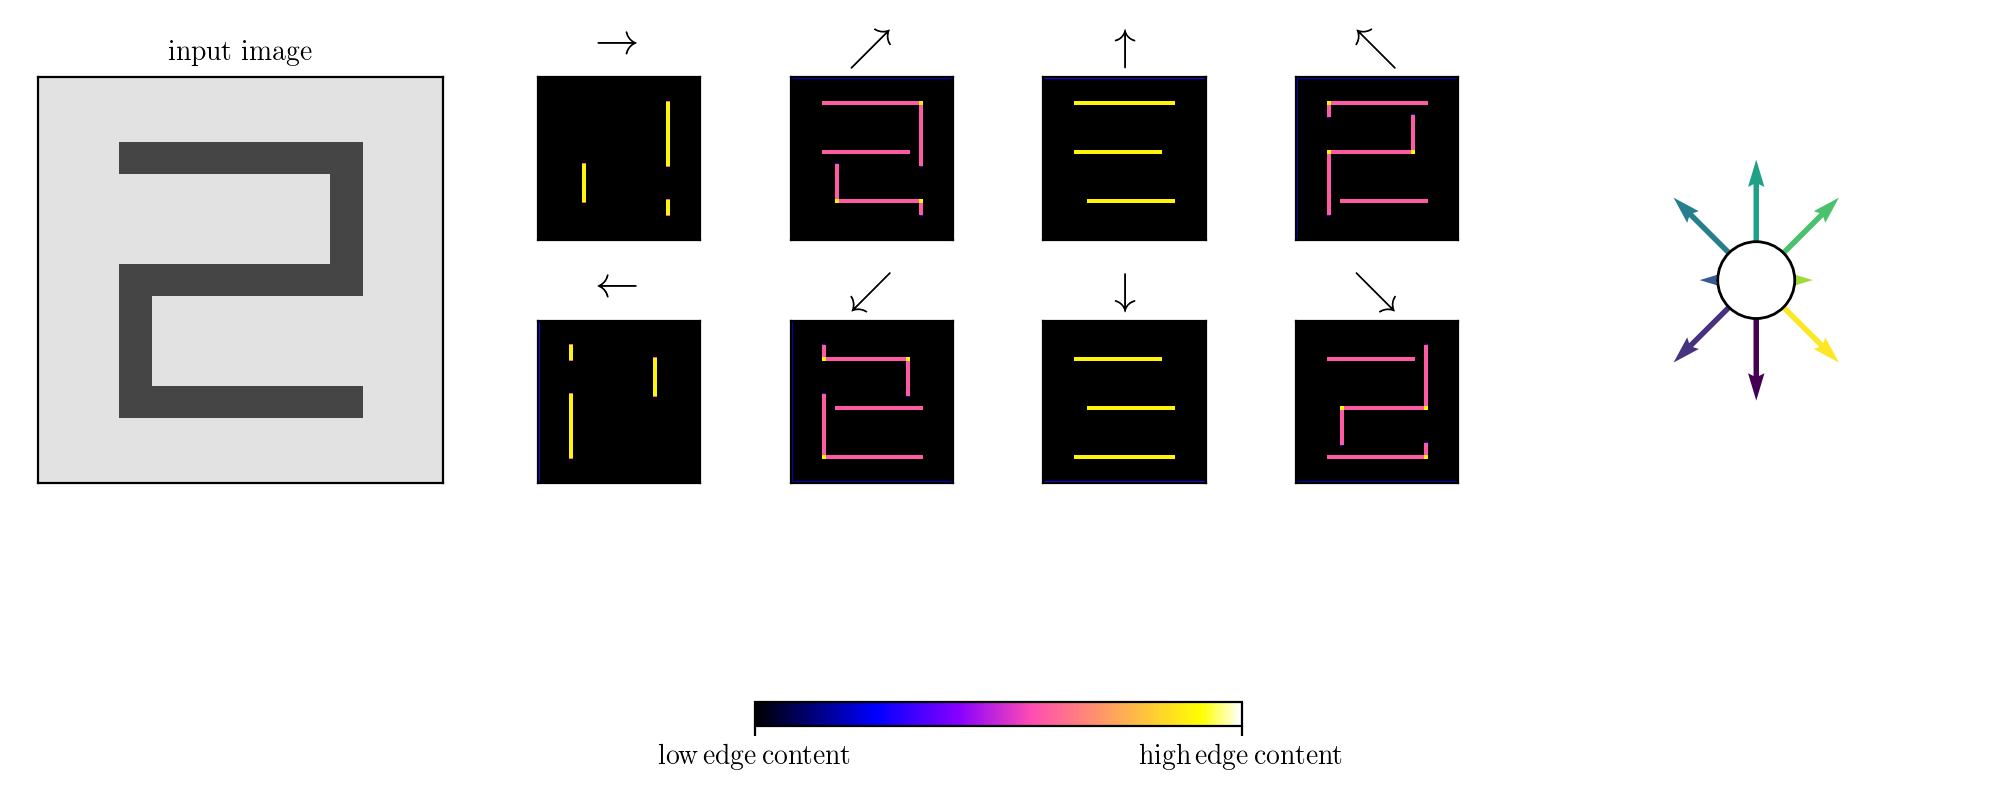

In [12]:
# load image
image = convlib.image_viz.create_image('2')

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


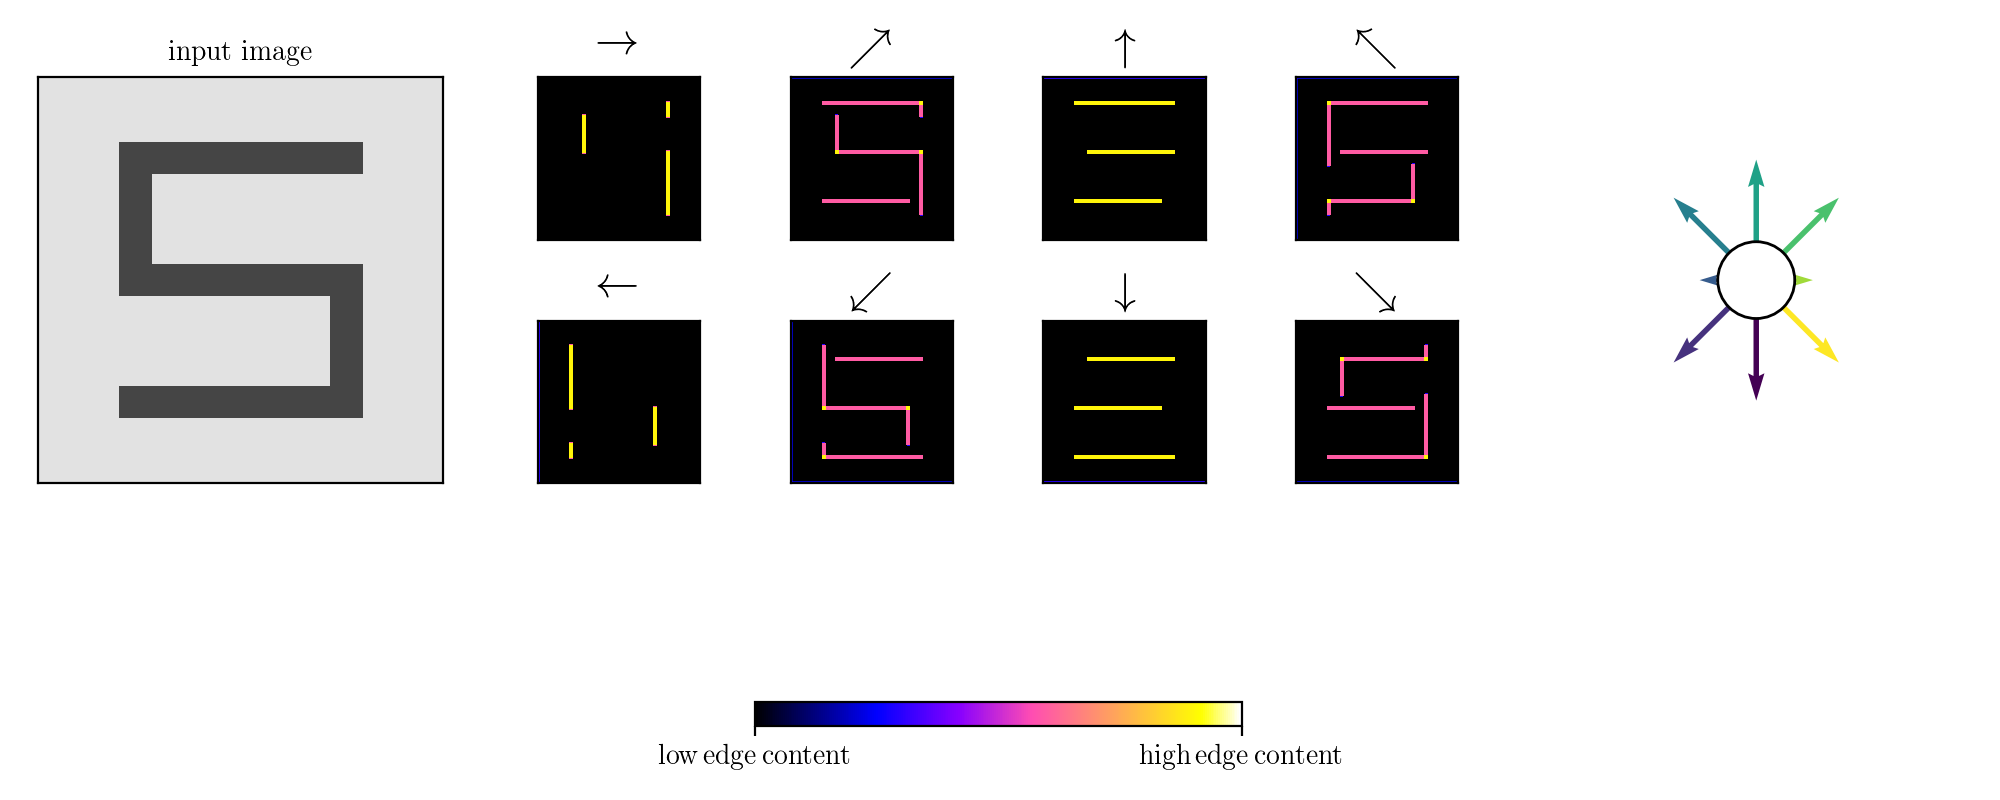

In [13]:
# load image
image = convlib.image_viz.create_image('5')

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


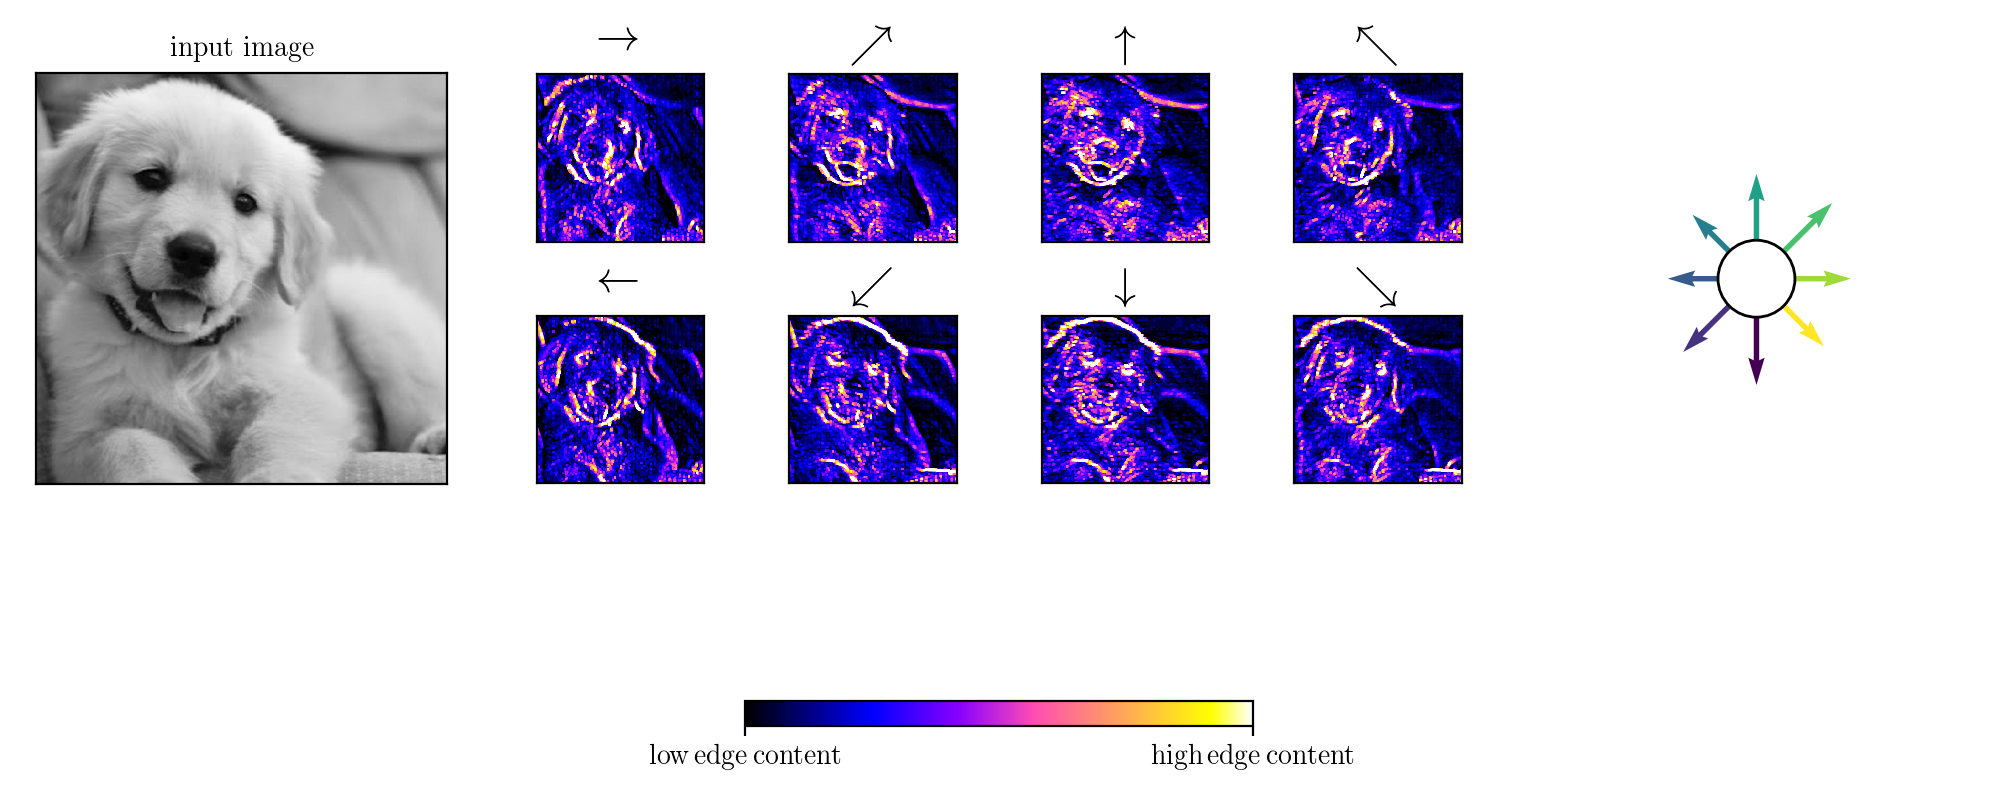

In [16]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/dog2.jpg',0)

# compute and plot convolution images
convlib.image_viz.show_conv_images(-image)

<IPython.core.display.Javascript object>


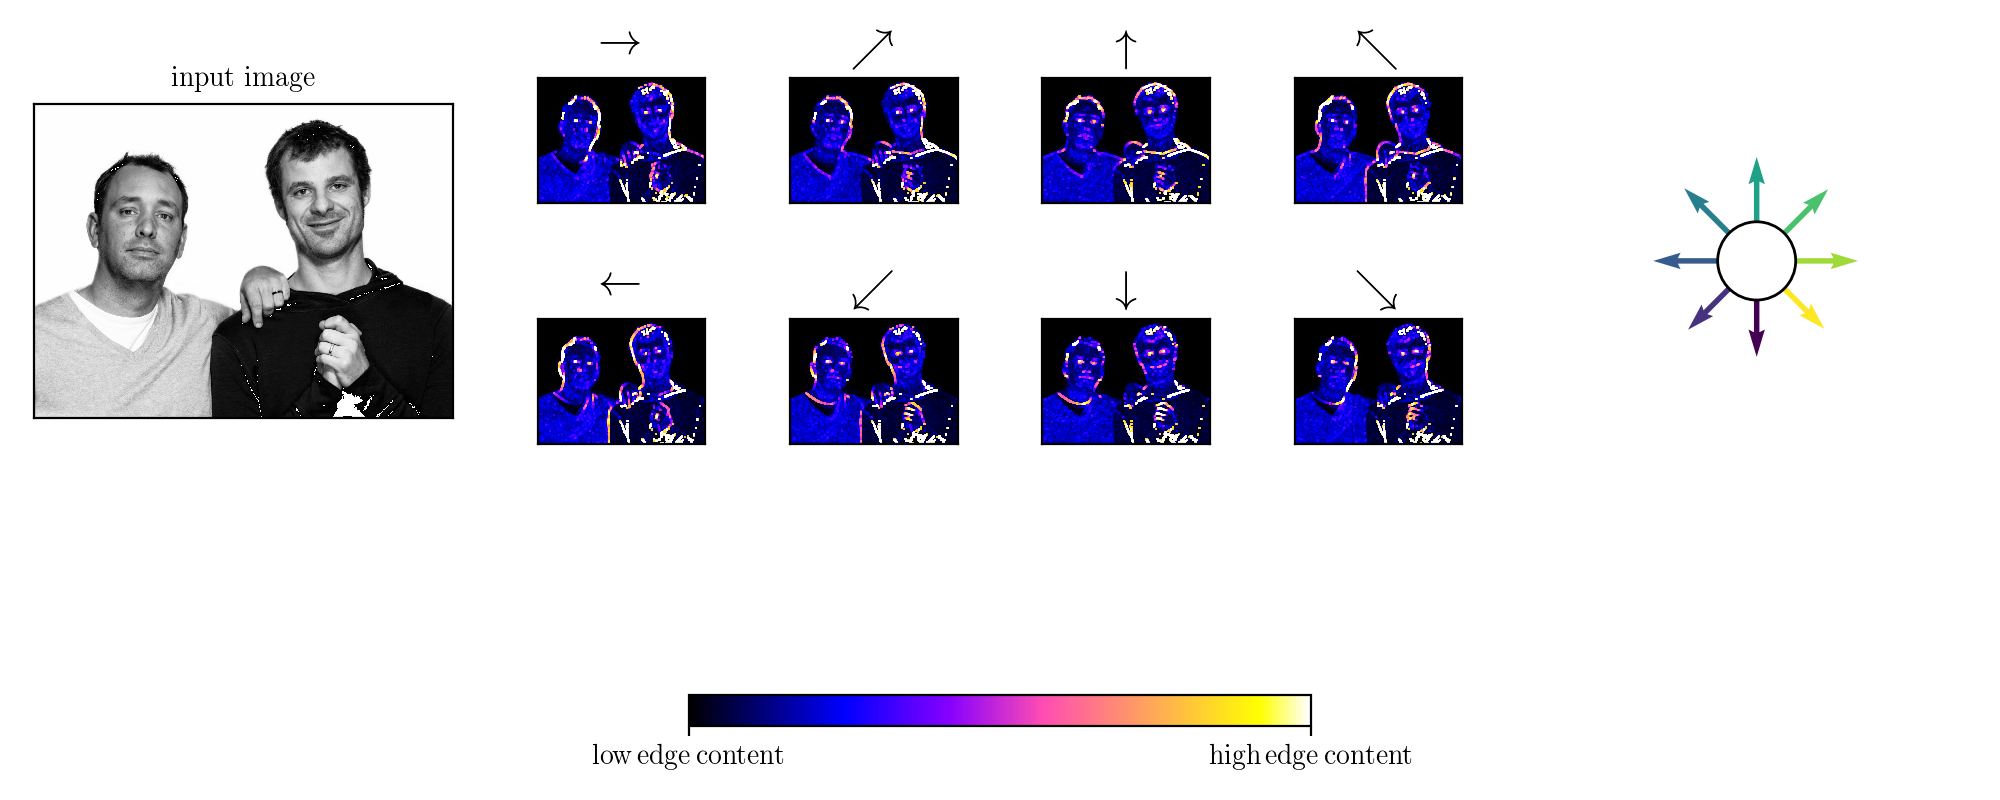

In [17]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/dudes.png',0)

# compute and plot convolution images
convlib.image_viz.show_conv_images(-image)

----

# Python implementation of convolution


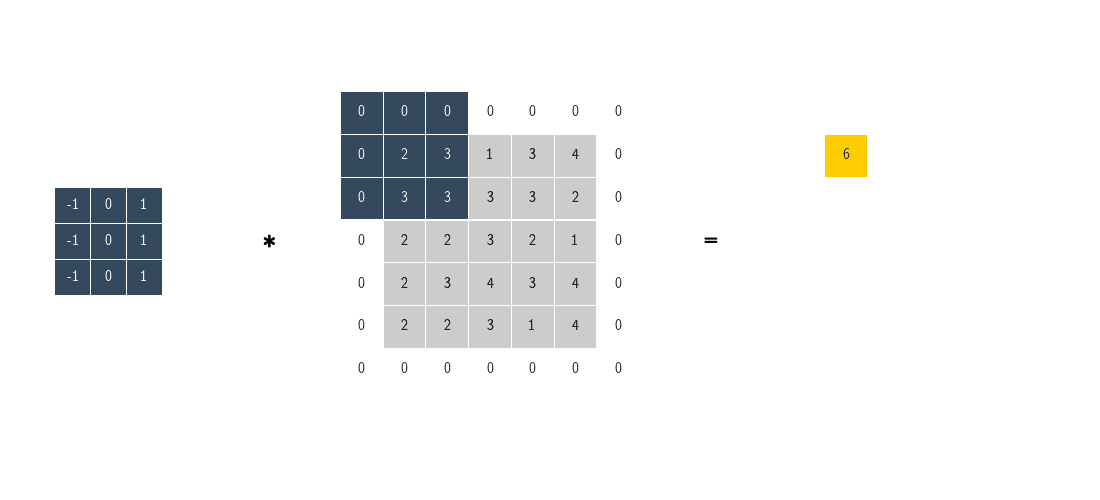
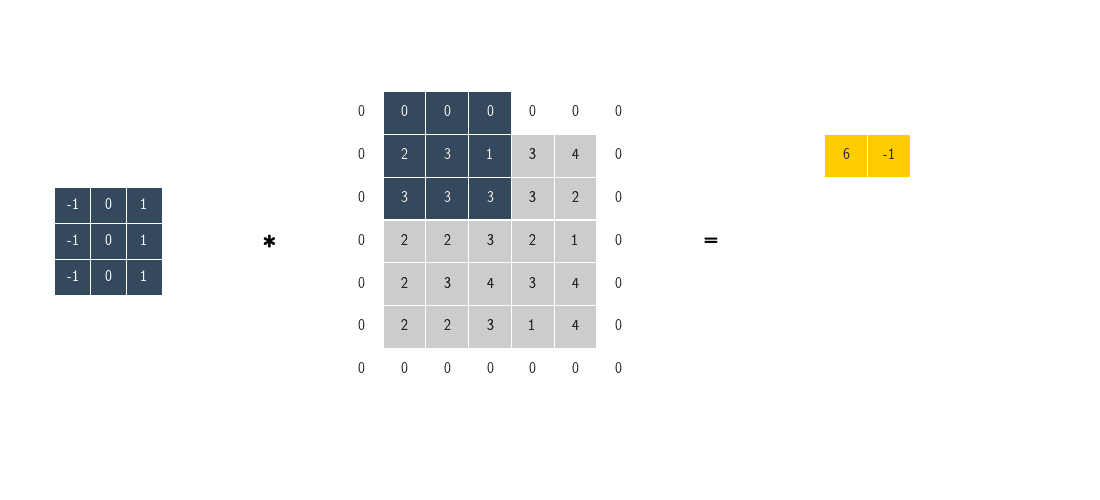
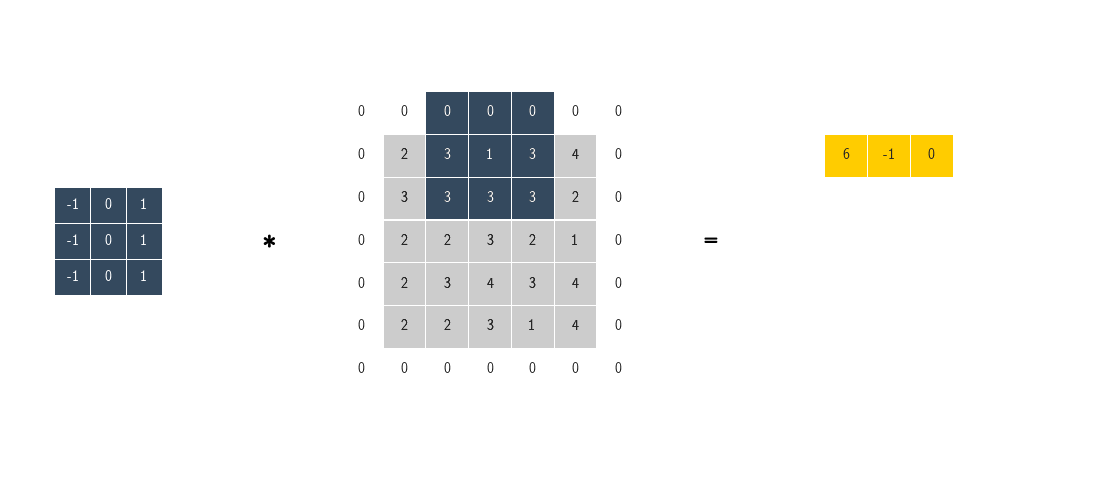
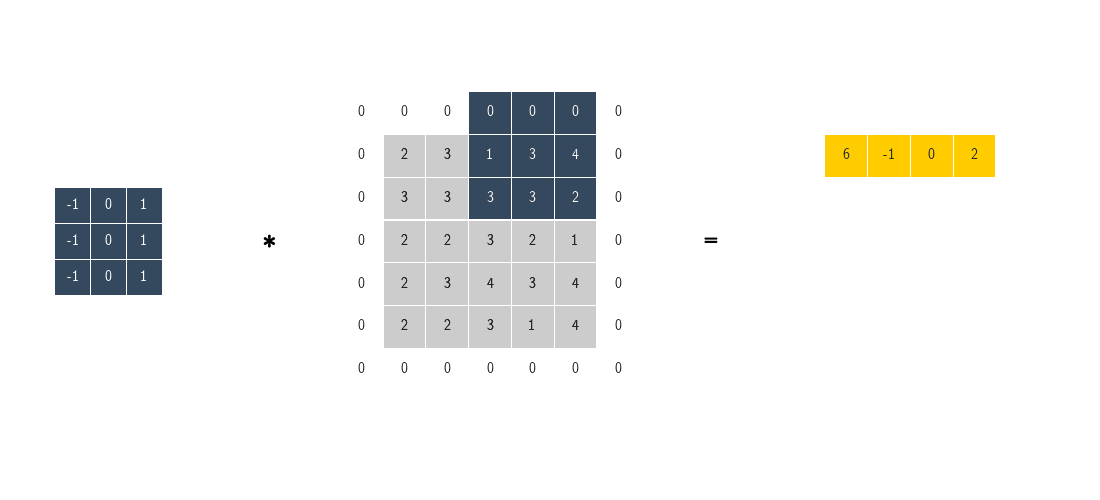
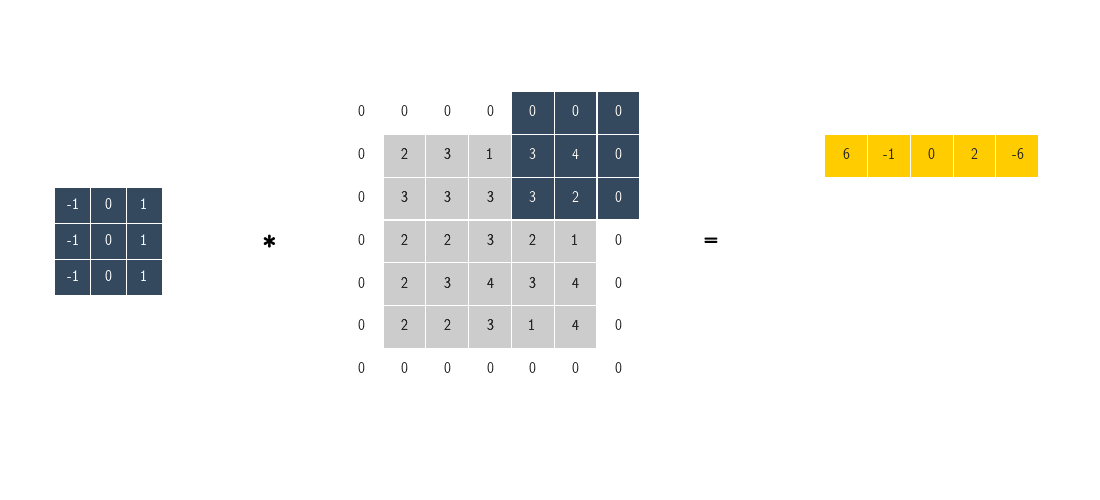
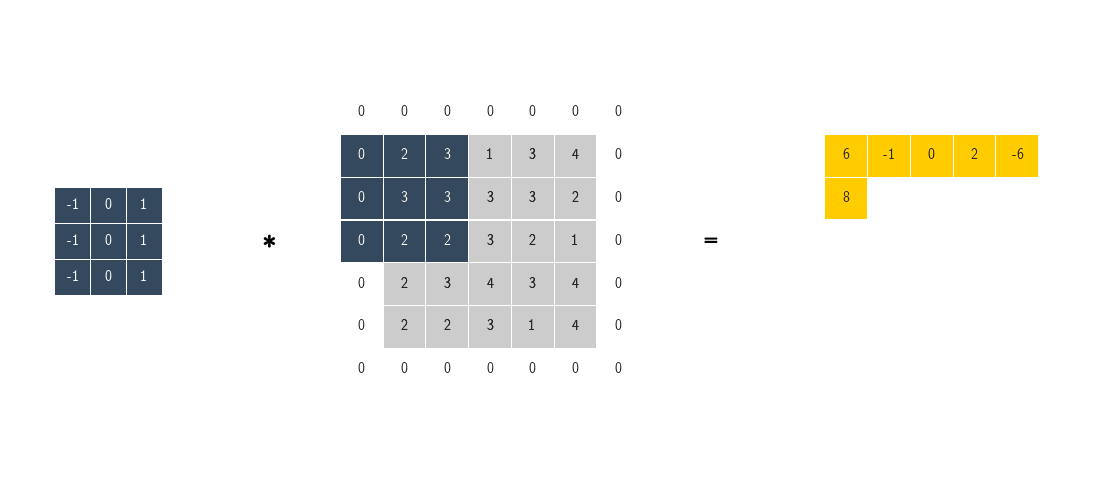
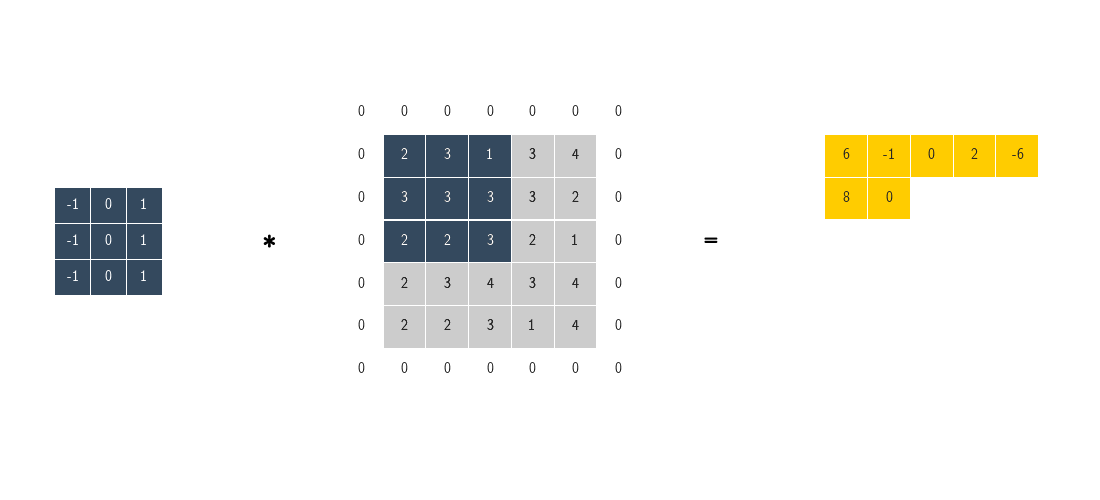
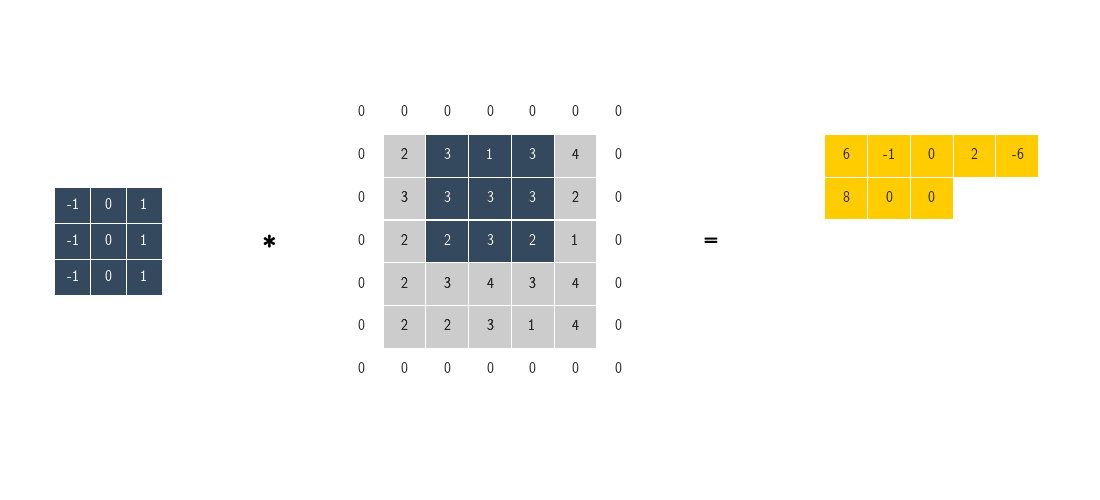
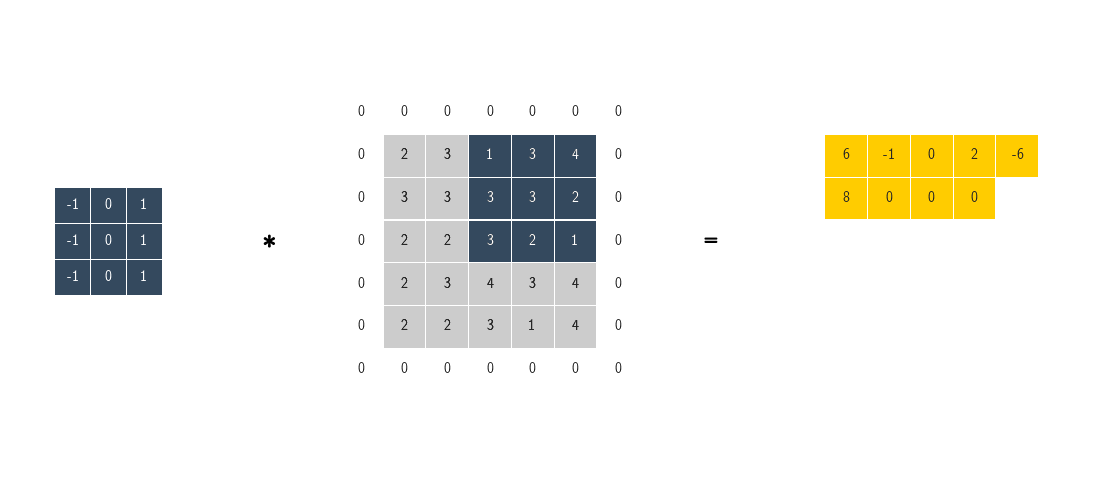
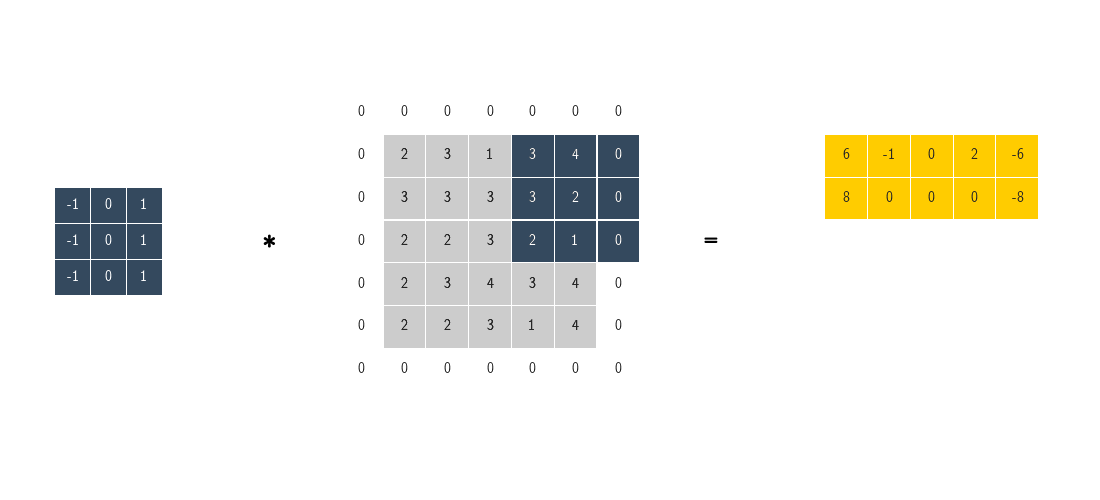
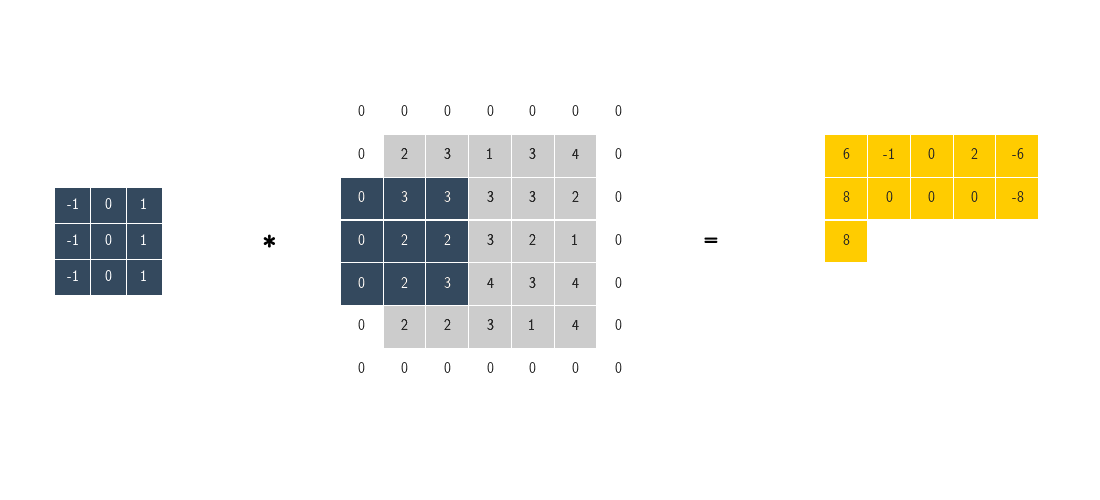
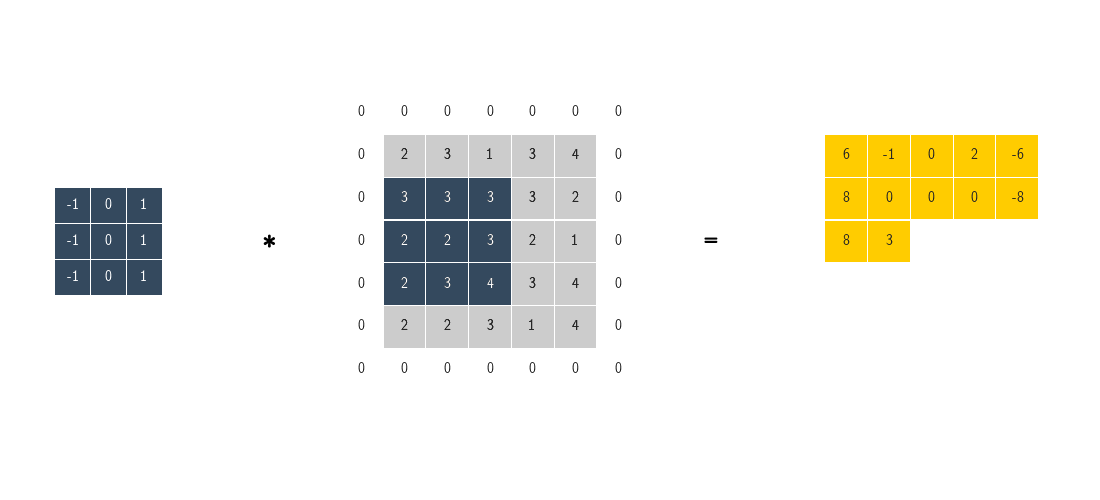
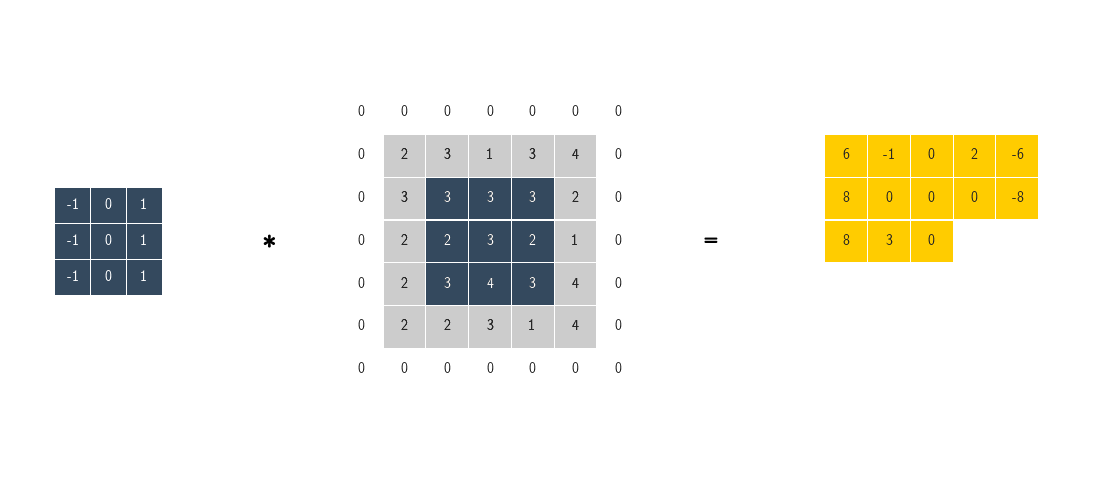
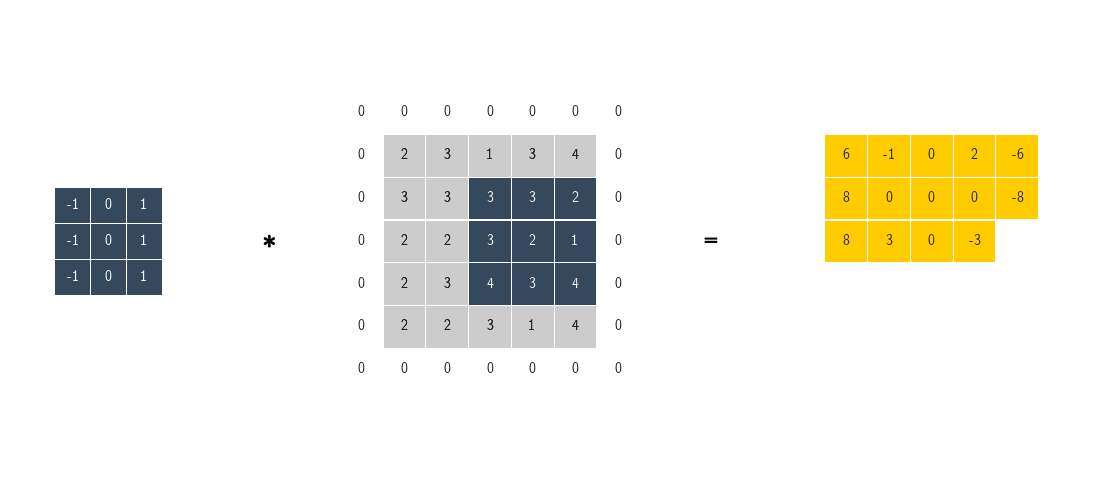
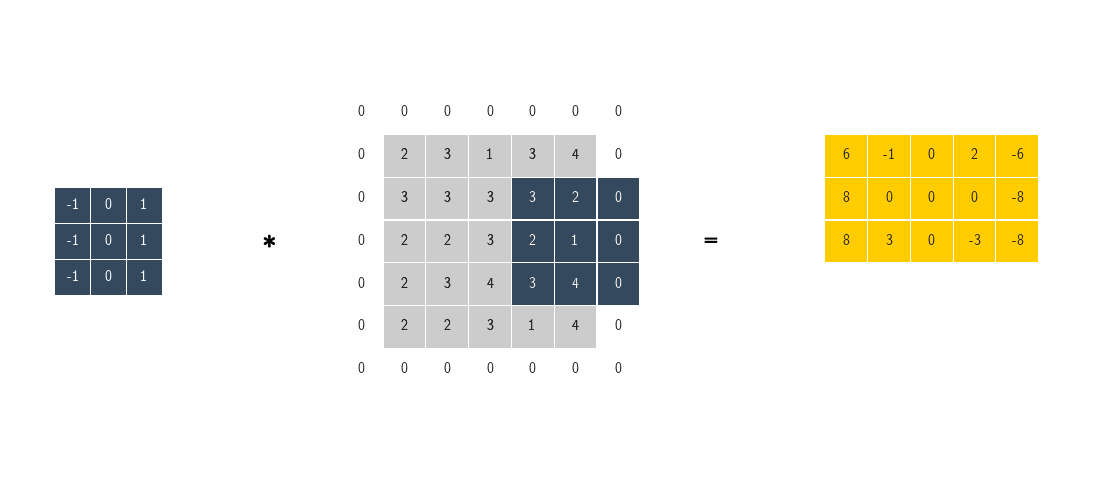
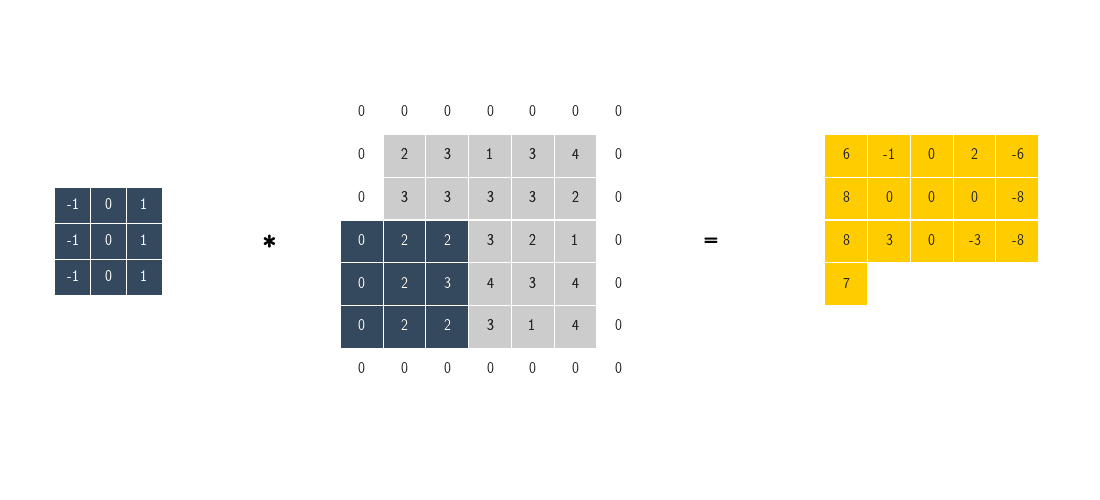
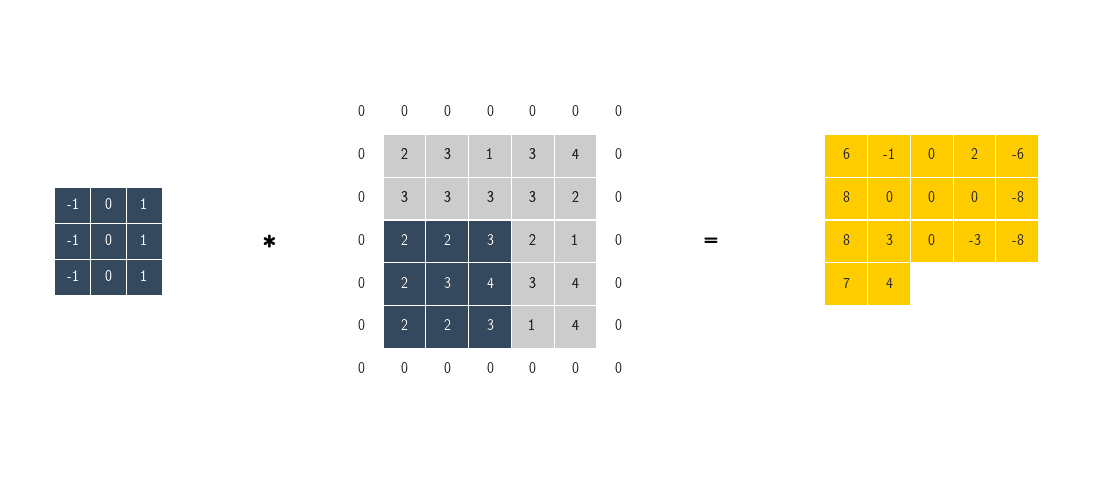
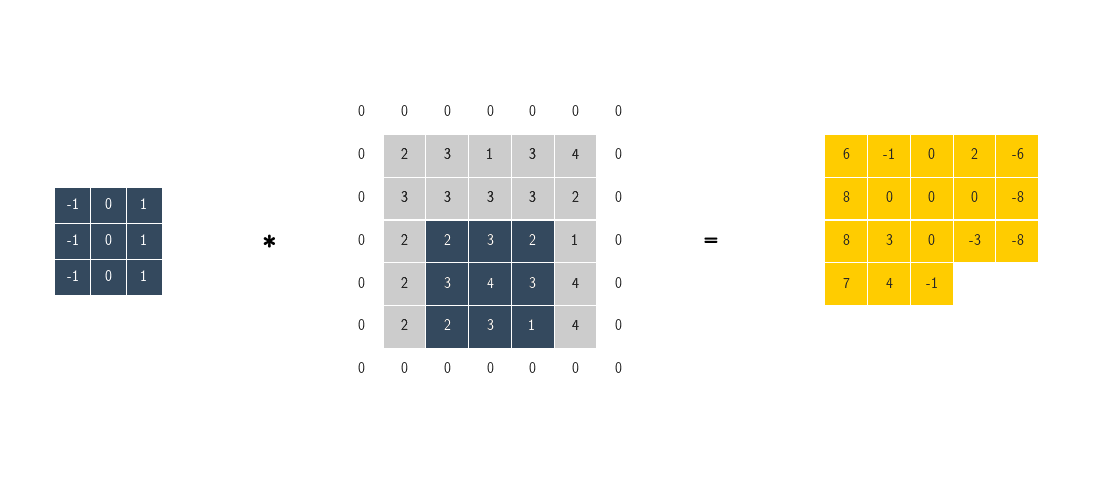
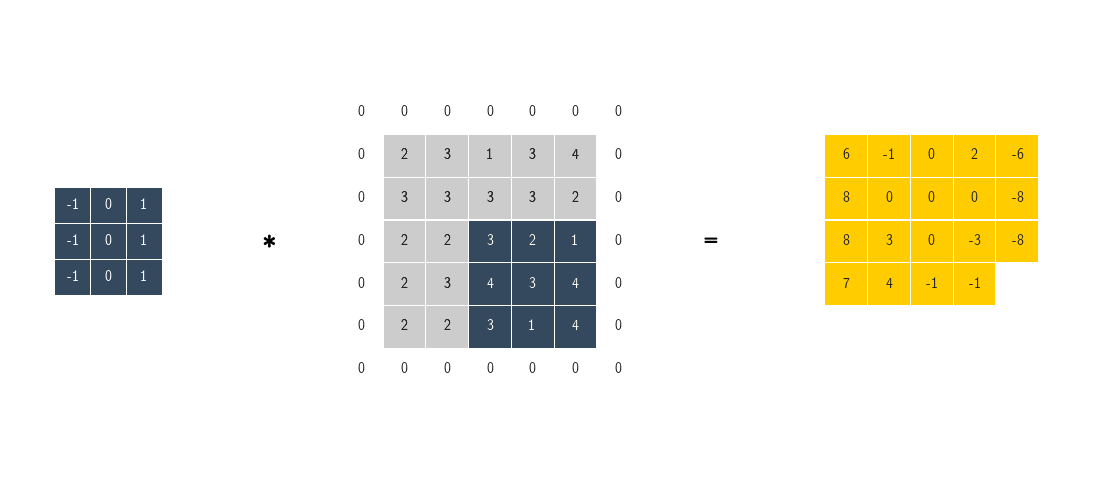
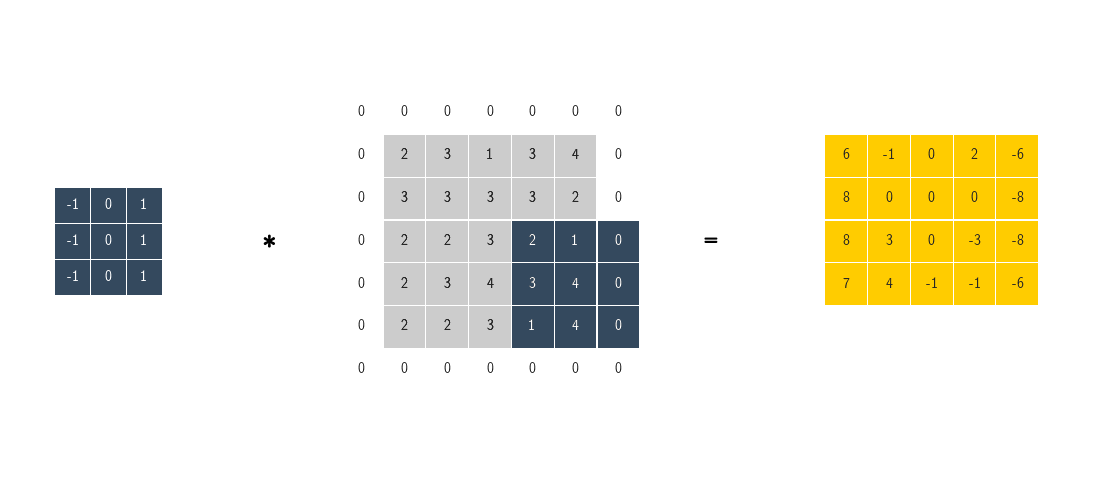
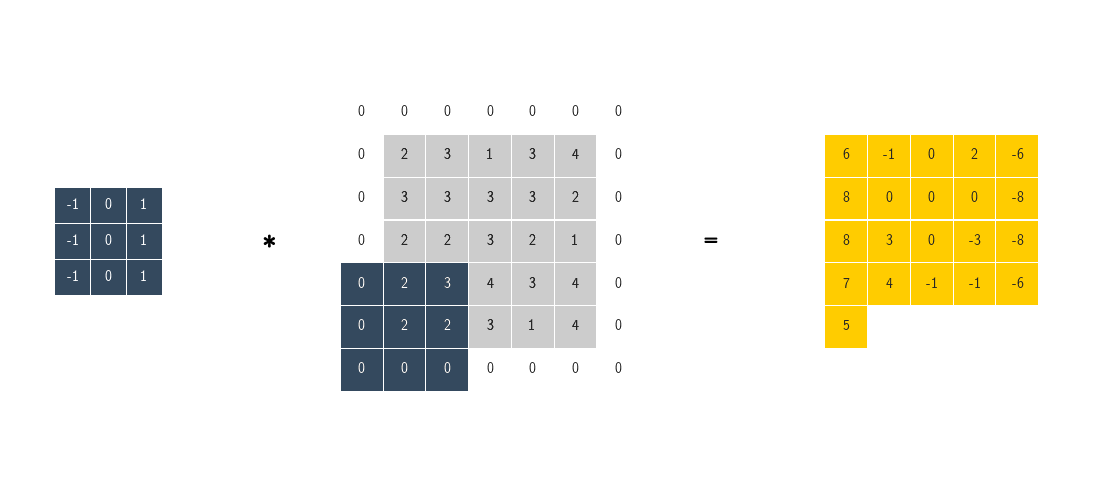
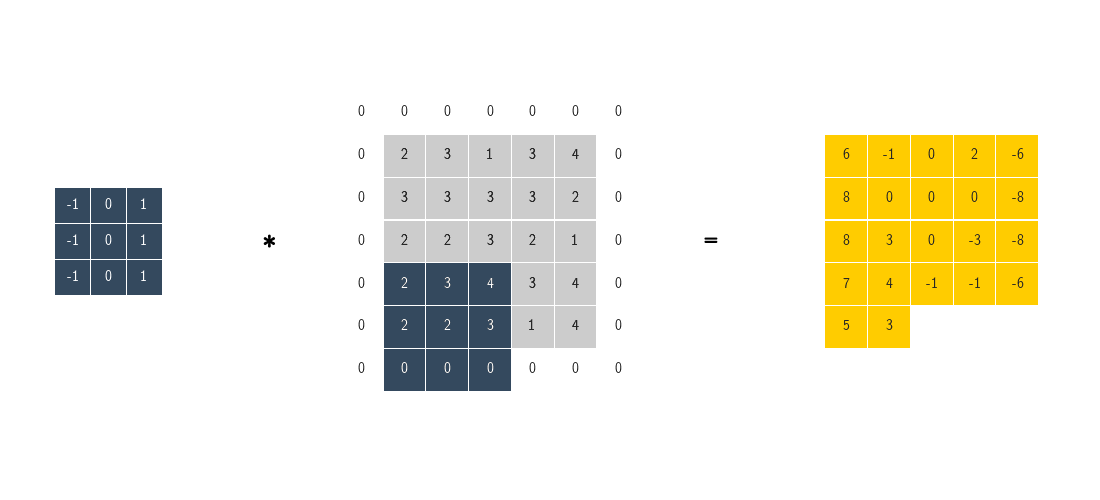
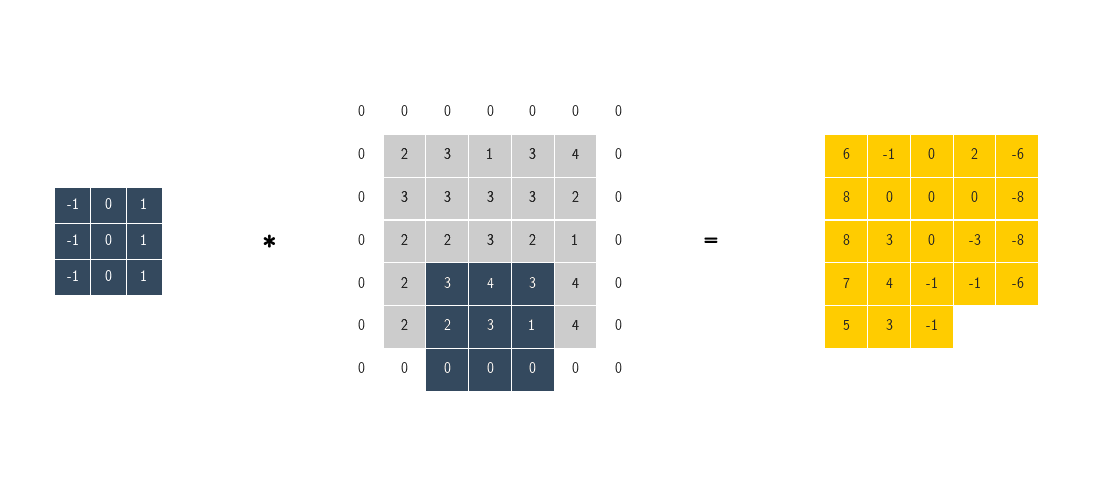
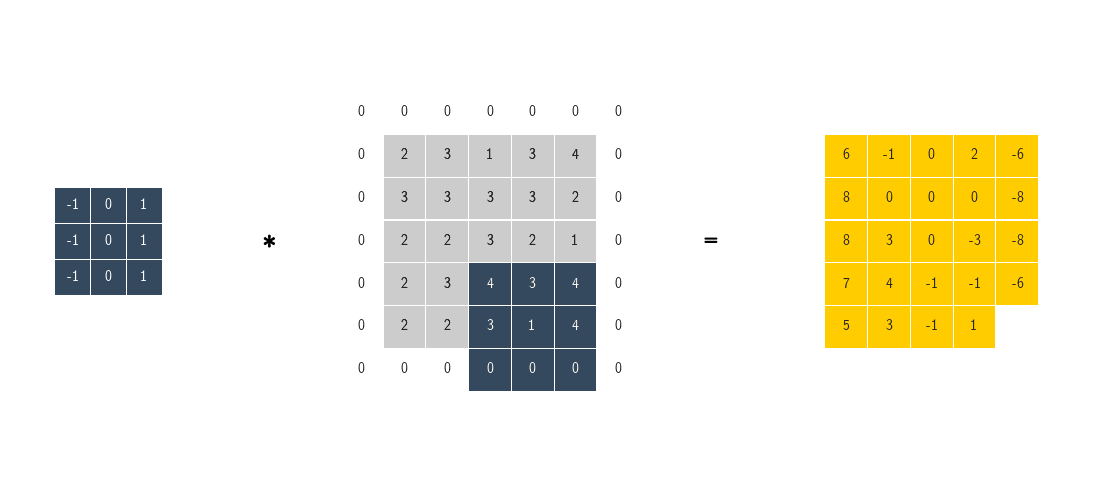
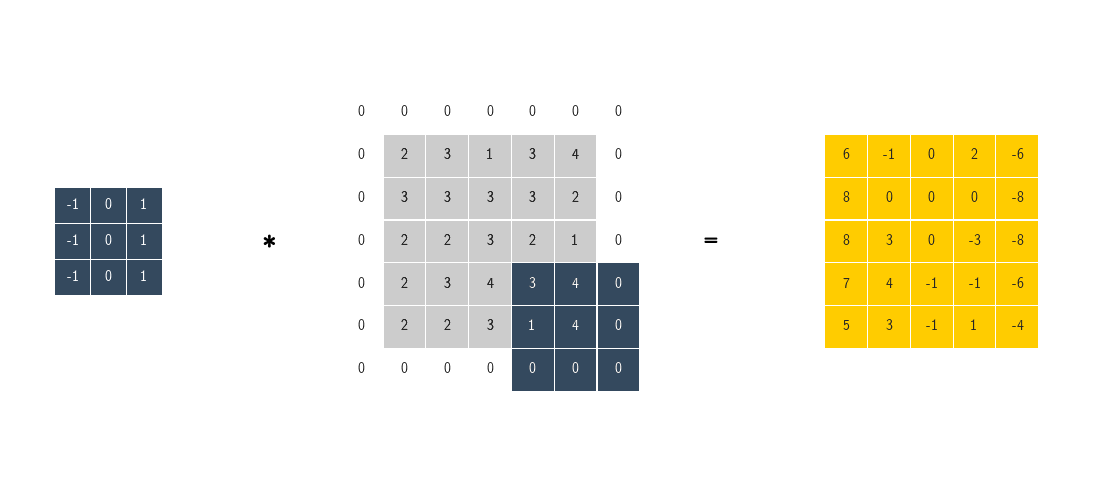

In [18]:
x = 1+np.random.randint(4, size=(5,5))
w = np.array([[-1,  0,  1],
              [-1,  0,  1],
              [-1,  0,  1]])

# create an instance of the visualizer with this input sequence
conv_viz = convlib.sliding_convolution.visualizer(image = x, kernel = w)

# run the visualizer for our chosen input sequence
conv_viz.draw_it(mode='int')

In [5]:
# specify kernel
kernel = np.array([[-1,  0,  1],
              [-1,  0,  1],
              [-1,  0,  1]])
print('kernel \n', kernel)

# specify image
image = 1+np.random.randint(6, size=(6,6))
print('image\n', image)

kernel 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
image
 [[3 6 4 3 4 5]
 [4 2 2 4 2 4]
 [3 1 3 4 1 6]
 [6 1 6 5 5 6]
 [6 3 3 2 2 5]
 [4 5 1 2 5 3]]


In [6]:
L = int((np.shape(kernel)[0]-1)/2) 
 
# pad image with appropriate number of zeros for convolution
def pad_image(image, L):
    image_padded = np.zeros((np.shape(image)[0] + 2*L, np.shape(image)[1] + 2*L))
    image_padded[L:-L, L:-L] = image
    return image_padded 

In [7]:
def convolution_function(window):
    return np.sum(kernel*window)  

In [8]:
def sliding_window(image, window_size, func):
    
    # grab image size, set container for results
    image_size = np.shape(image)[0]
    results = []
    
    # slide window over input image
    for i in np.arange(0, image_size - window_size + 1, 1):
        for j in np.arange(0, image_size - window_size + 1, 1):
            # extract window from the image
            window = image[i:i+window_size,j:j+window_size]
            
            # process using the input 'func' (here the convolution function)
            processed_window = func(window)
            
            # store the results
            results.append(processed_window)
    
    # return results in numpy array format
    return np.array(results)

In [9]:
###### call sliding_window 
results = sliding_window(pad_image(image, L), 2*L+1, convolution_function)

# reshape results to become a matrix with the same size as the original image 
conv = np.reshape(results, np.shape(image))
print('convolution result \n', conv)

convolution result 
 [[  8.  -1.  -1.   0.   2.  -6.]
 [  9.  -1.   2.  -2.   4.  -7.]
 [  4.  -2.   9.  -3.   3.  -8.]
 [  5.  -3.   6.  -4.   6.  -8.]
 [  9.  -6.   0.   2.   5. -12.]
 [  8.  -6.  -4.   3.   4.  -7.]]


In [10]:
conv

array([[  8.,  -1.,  -1.,   0.,   2.,  -6.],
       [  9.,  -1.,   2.,  -2.,   4.,  -7.],
       [  4.,  -2.,   9.,  -3.,   3.,  -8.],
       [  5.,  -3.,   6.,  -4.,   6.,  -8.],
       [  9.,  -6.,   0.,   2.,   5., -12.],
       [  8.,  -6.,  -4.,   3.,   4.,  -7.]])

# Python implementation of pooling

In [13]:
def sliding_window(image, window_size, func, stride):
    
    # grab image size, set container for results
    image_size = np.shape(image)[0]
    results = []
    
    # slide window over input image
    for i in np.arange(0, image_size - window_size + 1, stride):
        for j in np.arange(0, image_size - window_size + 1, stride):
            # extract window from the image
            window = image[i:i+window_size,j:j+window_size]
            
            # process using the input 'func' (here the convolution function)
            processed_window = func(window)
            
            # store the results
            results.append(processed_window)
    
    # return results in numpy array format
    return np.array(results)

In [14]:
def pool_function(window):
    return np.sum(window)

In [15]:
###### call sliding_window 
results = sliding_window(conv, 3, pool_function, 3)

# reshape results to become a matrix with the same size as the original image 
pool = np.reshape(results, (2,2))
print('convolution result \n', pool)

convolution result 
 [[ 27. -17.]
 [  9. -11.]]


# Putting all pieces together

<figure>
<img src="../../mlrefined_images/convnet_images/pipeline2.png" width="90%" height="auto"/>
</figure>

In [27]:
def make_feature_map(image, kernel):
    
    # parameters for transform
    kernel_size = kernels[0].shape[0]
    pool_kernel_size = 6
    stride = 3
    
    # pad image with zeros
    padded_image = self.pad_image(image,kernel_size)
        
    # window image
    feature_map = self.sliding_window_image(padded_image,kernel_size,stride = 1,func = self.conv_function)
        
    # reshape convolution feature map into array
    feature_map = np.reshape(feature_map,(np.shape(image)))
        
    # now shove result through nonlinear activation
    feature_map = self.activation(feature_map)

    #### now pool / downsample feature map, first window then pool on each window
    max_pool = self.sliding_window_image(feature_map,pool_kernel_size,stride = stride,func = self.pool_function)

    # reshape into new tensor
    max_pool = np.reshape(max_pool, (int((np.size(max_pool))**(0.5)),int((np.size(max_pool))**(0.5))))

    return max_pool

----

In [28]:
class naive_conv_layer:
    '''
    A simple convnet module.  Here we calculate feature maps exactly one at a time, using
    a host of nested for-loops.  This means computation will be quite slow!  However this
    can still be used in theory as a fixed convolutional feature extractor or as a convolutional
    layer in a conv net (where the kernels are learned).
    '''   
    
    # a convolution function
    def conv_function(self,window):
        conv = np.sum(self.kernel*window)
        return conv

    # a pooling function
    def pool_function(self,window):
        pool = np.max(window)
        return pool

    # activation function
    def activation(self,window):
        a = np.maximum(0,window)
        return a
    
    # pad image with appropriate number of zeros for convolution
    def pad_image(self,image,kernel_size):
        odd_nums = np.array([int(2*n + 1) for n in range(100)])
        pad_val = np.argwhere(odd_nums == kernel_size)[0][0]
        image_padded = np.zeros((np.shape(image) + 2*pad_val))
        image_padded[pad_val:-pad_val,pad_val:-pad_val] = image
        return image_padded          
    
    # sliding window function, convolution or pooling done on each window
    def sliding_window_image(self,image,window_size,stride,func):
        # grab image size, set container for results
        image_size = np.shape(image)[0]
        results = []

        # slide window over input image with given window size / stride and function
        for i in np.arange(0, image_size - window_size + 1, stride):
            for j in np.arange(0, image_size - window_size + 1, stride):
                # now we have a window from our image, and use the desired 'func' to process it
                window = image[i:i+window_size,j:j+window_size]

                # process using input func
                processed_window = func(window)
                results.append(processed_window)

        # array-afy results
        results = np.array(results)

        # return results in numpy array format
        return results
    
    # make feature map for input inage and kernel
    def make_feature_map(self,image,kernel):
        # parameters for transform
        kernel_size = kernels[0].shape[0]
        pool_kernel_size = 6
        stride = 3
    
        # pad image with zeros
        padded_image = self.pad_image(image,kernel_size)
        
        # window image
        feature_map = self.sliding_window_image(padded_image,kernel_size,stride = 1,func = self.conv_function)
        
        # reshape convolution feature map into array
        feature_map = np.reshape(feature_map,(np.shape(image)))
        
        # now shove result through nonlinear activation
        feature_map = self.activation(feature_map)

        #### now pool / downsample feature map, first window then pool on each window
        max_pool = self.sliding_window_image(feature_map,pool_kernel_size,stride = stride,func = self.pool_function)

        # reshape into new tensor
        max_pool = np.reshape(max_pool, (int((np.size(max_pool))**(0.5)),int((np.size(max_pool))**(0.5))))

        return max_pool
        
    # main convolution layer definition
    def conv_layer(self,images,kernels):
        #### create image tensor from input images
        image_tensor = np.reshape(images,(np.shape(images)[0],int((np.shape(images)[1])**(0.5)),int( (np.shape(images)[1])**(0.5))),order = 'F')

        #### loop over each image, shove through filters and make feature maps, then downsample and pool
        new_tensors = []

        #### loop over images
        for image in image_tensor:
            #### loop over kernels and construct feature map for each kernel
            downsampled_feature_maps = []
            for kernel in kernels:
                self.kernel = kernel
                downsampled_map = self.make_feature_map(image,kernel)
                downsampled_feature_maps.append(downsampled_map)
            
            ## re-shape downsampled_feature_maps and store
            new_tensors.append(downsampled_feature_maps)

        # reshape new tensor properly
        new_tensors = np.array(new_tensors)
        new_tensors = np.reshape(new_tensors, (np.shape(new_tensors)[0],np.shape(new_tensors)[1],np.shape(new_tensors)[2]*np.shape(new_tensors)[3]))
        new_tensors = np.reshape(new_tensors, (np.shape(new_tensors)[0],np.shape(new_tensors)[1]*np.shape(new_tensors)[2]),order = 'F')

        return new_tensors

# Face detection using raw pixel values

In [16]:
# initialize network learner
demo = network_lib.network_learner.Network()

# load in dataset
datapath = '../../mlrefined_datasets/convnet_datasets/feat_face_data.csv'
data = np.loadtxt(datapath,delimiter = ',')

In [17]:
# load in data - for this one split up training and testing
ind = np.random.permutation(len(data))

# split it up
data_train = data[ind[:-2000],:]
data_test = data[ind[-2000:],:]
demo.input_data(data_train,data_test,normalize = True)

In [18]:
np.shape(data_test)

(2000, 785)

In [45]:
# choose cost function
demo.choose_cost(cost_name = 'twoclass_softmax')

# setup network architecture
activation_name = 'relu'
layer_sizes = [np.shape(data_train)[1]-1,10,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

In [46]:
# compute cost plots on training and testing data
demo.compute_cost_plots()

# compute lowest testing misclassifications
ind_min = np.argmin(demo.test_count_history)
test_min = demo.test_count_history[ind_min]
train_min = demo.train_count_history[ind_min]
print ('test misclassifications = ' + str(int(test_min)))
print ('train misclassifications = ' + str(int(train_min)))

test misclassifications = 81
train misclassifications = 139


<IPython.core.display.Javascript object>


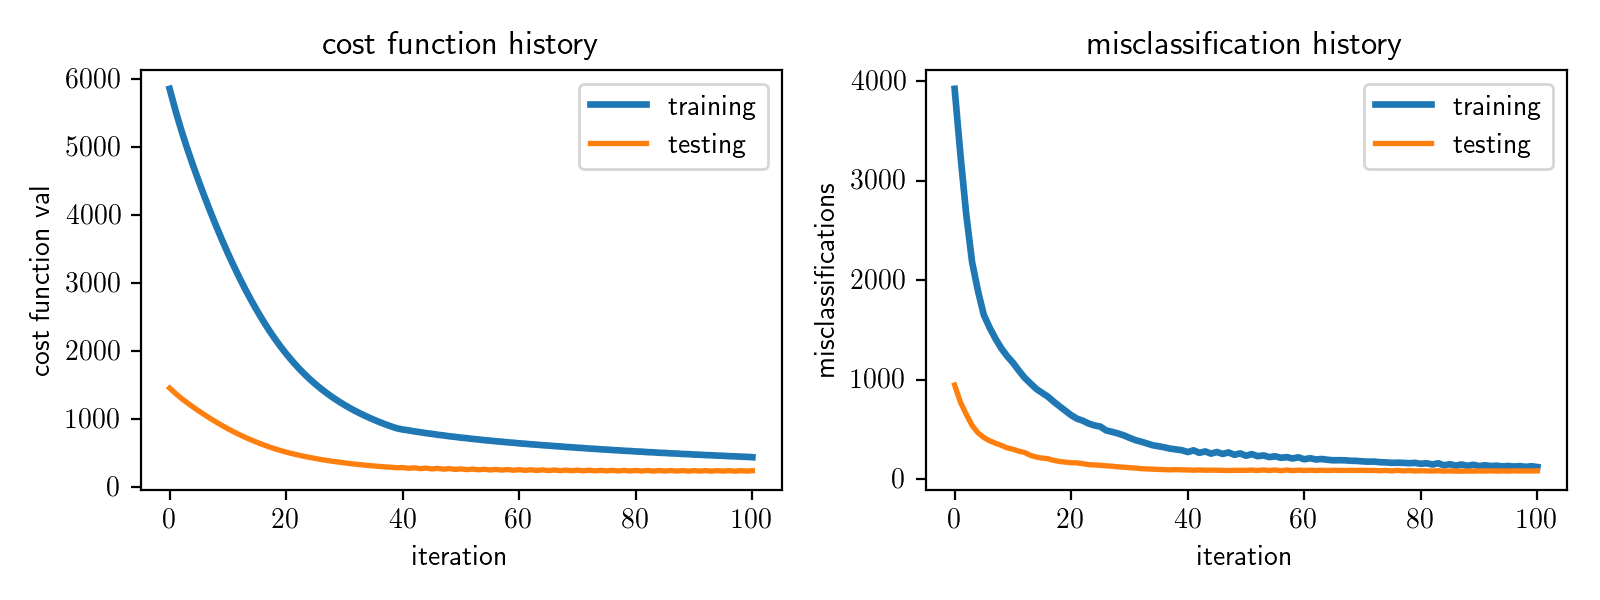

In [47]:
# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

# Face detection using edge features

In [19]:
kernels = np.array([
       [[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[-1, -1,  0],
        [-1,  0,  1],
        [ 0,  1,  1]],
    
        [[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]],

       [[ 0,  1,  1],
        [-1,  0,  1],
        [-1, -1,  0]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 0, -1, -1],
        [ 1,  0, -1],
        [ 1,  1,  0]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]],

       [[ 1,  1,  0],
        [ 1,  0, -1],
        [ 0, -1, -1]]])          

In [20]:
class tensor_conv_layer:    
    # convolution function
    def conv_function(self,tensor_window):
        tensor_window = np.reshape(tensor_window,(np.shape(tensor_window)[0],np.shape(tensor_window)[1]*np.shape(tensor_window)[2]))
        t = np.dot(self.kernels,tensor_window.T)
        return t

    # pooling / downsampling parameters
    def pool_function(self,tensor_window):
        t = np.max(tensor_window,axis = (1,2))
        return t

    # activation 
    def activation(self,tensor_window):
        return np.maximum(0,tensor_window)

    # pad image with appropriate number of zeros for convolution
    def pad_tensor(self,tensor,kernel_size):
        odd_nums = np.array([int(2*n + 1) for n in range(100)])
        pad_val = np.argwhere(odd_nums == kernel_size)[0][0]
        tensor_padded = np.zeros((np.shape(tensor)[0], np.shape(tensor)[1] + 2*pad_val,np.shape(tensor)[2] + 2*pad_val))
        tensor_padded[:,pad_val:-pad_val,pad_val:-pad_val] = tensor
        return tensor_padded    
    
    # sliding window for image augmentation
    def sliding_window_tensor(self,tensor,window_size,stride,func):
        # grab image size, set container for results
        image_size = np.shape(tensor)[1]
        results = []
        
        # slide window over input image with given window size / stride and function
        for i in np.arange(0, image_size - window_size + 1, stride):
            for j in np.arange(0, image_size - window_size + 1, stride):
                # take a window of input tensor
                tensor_window =  tensor[:,i:i+window_size, j:j+window_size]
                
                # now process entire windowed tensor at once
                tensor_window = np.array(tensor_window)
                yo = func(tensor_window)

                # store weight
                results.append(yo)
        
        # re-shape properly
        results = np.array(results)
        results = results.swapaxes(0,1)
        if func == self.conv_function:
            results = results.swapaxes(1,2)
        return results 

    # make feature map
    def make_feature_tensor(self,tensor):
        # create feature map via convolution --> returns flattened convolution calculations
        conv_stride = 1
        feature_tensor = self.sliding_window_tensor(tensor,self.kernel_size,conv_stride,self.conv_function) 

        # re-shape convolution output ---> to square of same size as original input
        num_filters = np.shape(feature_tensor)[0]
        num_images = np.shape(feature_tensor)[1]
        square_dim = int((np.shape(feature_tensor)[2])**(0.5))
        feature_tensor = np.reshape(feature_tensor,(num_filters,num_images,square_dim,square_dim))
        
        # shove feature map through nonlinearity
        feature_tensor = self.activation(feature_tensor)

        # pool feature map --- i.e., downsample it
        pool_stride = 3
        pool_window_size = 6
        downsampled_feature_map = []
        for t in range(np.shape(feature_tensor)[0]):
            temp_tens = feature_tensor[t,:,:,:]
            d = self.sliding_window_tensor(temp_tens,pool_window_size,pool_stride,self.pool_function)
            downsampled_feature_map.append(d)
        downsampled_feature_map = np.array(downsampled_feature_map)

        # return downsampled feature map --> flattened
        return downsampled_feature_map

    # our normalization function
    def normalize(self,data,data_mean,data_std):
        normalized_data = (data - data_mean)/(data_std + 10**(-5))
        return normalized_data

    # convolution layer
    def conv_layer(self,tensor,kernels):
        #### prep input tensor #####
        # pluck out dimensions for image-tensor reshape
        num_images = np.shape(tensor)[0]
        num_kernels = np.shape(kernels)[0]
        
        # create tensor out of input images (assumed to be stacked vertically as columns)
        tensor = np.reshape(tensor,(np.shape(tensor)[0],int((np.shape(tensor)[1])**(0.5)),int( (np.shape(tensor)[1])**(0.5))),order = 'F')

        # pad tensor
        kernel = kernels[0]
        self.kernel_size = np.shape(kernel)[0]
        padded_tensor = self.pad_tensor(tensor,self.kernel_size)

        #### prep kernels - reshape into array for more effecient computation ####
        self.kernels = np.reshape(kernels,(np.shape(kernels)[0],np.shape(kernels)[1]*np.shape(kernels)[2]))
        
        #### compute convolution feature maps / downsample via pooling one map at a time over entire tensor #####
        # compute feature map for current image using current convolution kernel
        feature_tensor = self.make_feature_tensor(padded_tensor)

        feature_tensor = feature_tensor.swapaxes(0,1)
        feature_tensor = np.reshape(feature_tensor, (np.shape(feature_tensor)[0],np.shape(feature_tensor)[1]*np.shape(feature_tensor)[2]),order = 'F')
        
        return feature_tensor
    
    ##### some supervised learning capabilities #####
    def load_data(self,x,y):
        self.x = x
        self.y = y
        
    def predict(self,x,w):
        # pass input data through convolutional layer
        x_conv = self.conv_layer(x,w[0])
        
        # take inner product against output of conv layer
        value = w[1][0] + np.dot(x_conv,w[1][1:])
        return value
    
    # the softmax cost function 
    def softmax(self,w):
        cost  = np.sum(np.log(1 + np.exp((-self.y)*(self.predict(self.x,w)))))
        return cost
    
    def count(self,w):
        return 0.25*np.sum((np.sign(self.predict(self.x,w)) - self.y)**2)

In [21]:
# extract input tensor
tensor = data[:,:-1]
y = data[:,-1:]

# contrast normalize image data
def contrast_normalize(data):
    data_means = np.mean(data,axis = 0)
    data = data - data_means
    data_stds = np.std(data,axis = 0)
    data = data/data_stds
    return data

# contrast normalize the input 
tensor_decontrast = contrast_normalize(tensor.T).T

# run through conv layer with fixed kernels
test = tensor_conv_layer()
new_tensor = test.conv_layer(tensor_decontrast,kernels)

# make new data based on fixed kernel convolutions
data = np.concatenate((tensor_decontrast,y),axis = 1)
new_data = np.concatenate((new_tensor,y),axis = 1)

In [22]:
# split it up
data_train = new_data[ind[:-2000],:]
data_test = new_data[ind[-2000:],:]
demo.input_data(data_train,data_test,normalize = True)

In [23]:
np.shape(data_test)

(2000, 513)

In [52]:
# choose cost function
demo.choose_cost(cost_name = 'twoclass_softmax')

# setup network architecture
activation_name = 'maxout'
layer_sizes = [np.shape(data_train)[1]-1,10,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

In [53]:
# compute cost plots on training and testing data
demo.compute_cost_plots()

# compute lowest testing misclassifications
ind_min = np.argmin(demo.test_count_history)
test_min = demo.test_count_history[ind_min]
train_min = demo.train_count_history[ind_min]
print ('test misclassifications = ' + str(int(test_min)))
print ('train misclassifications = ' + str(int(train_min)))

test misclassifications = 27
train misclassifications = 14


<IPython.core.display.Javascript object>


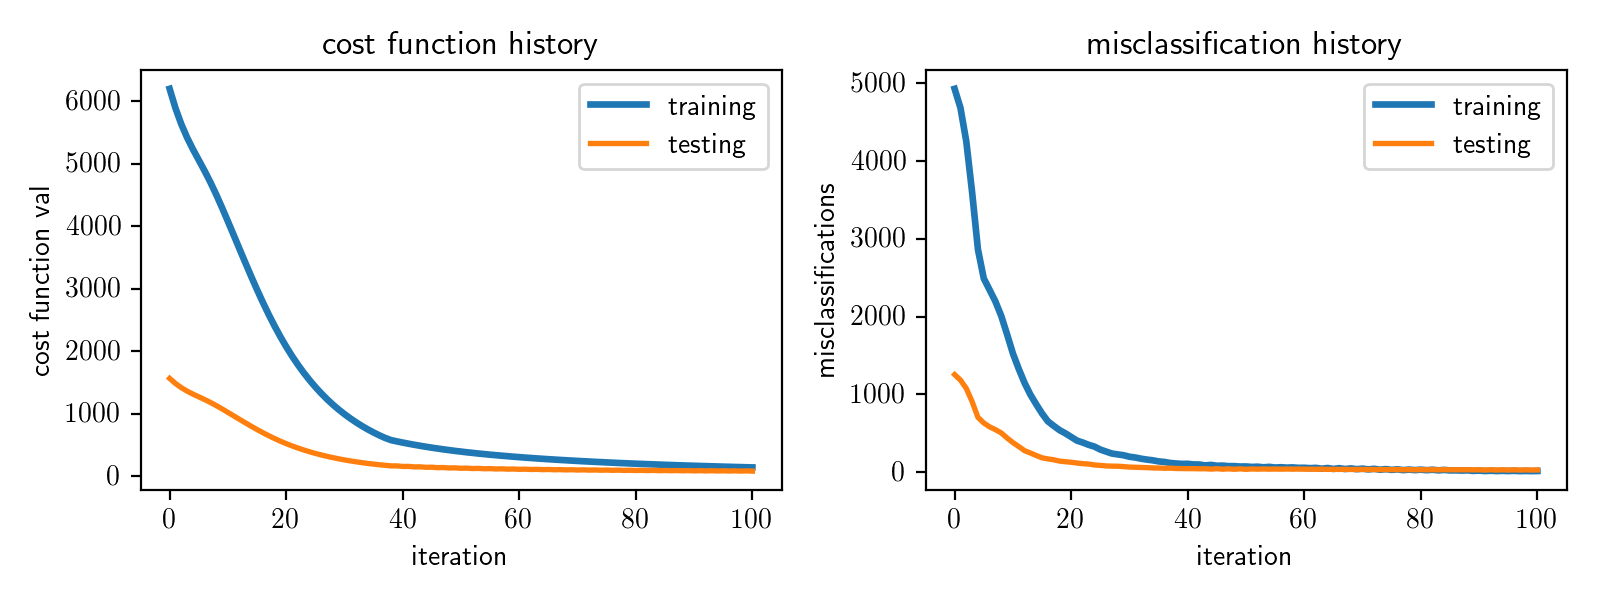

In [54]:
# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)